In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Modelling & Numerical Methods <a class="tocSkip">

## ODE solvers (or time-stepping methods - numerical solution of IVPs) 2 <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

**WARNING**

Note that some of the cells below take quite a few minutes to run since we consider multiple methods and multiple time step sizes in some of the convergence comparison tests. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---SciPy-methods-comparison" data-toc-modified-id="Homework---SciPy-methods-comparison-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - SciPy methods comparison</a></span><ul class="toc-item"><li><span><a href="#Solution---SciPy-methods-comparison" data-toc-modified-id="Solution---SciPy-methods-comparison-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - SciPy methods comparison</a></span></li></ul></li><li><span><a href="#Homework---The-van-der-Pol-problem" data-toc-modified-id="Homework---The-van-der-Pol-problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - The van der Pol problem</a></span><ul class="toc-item"><li><span><a href="#Solution---The-van-der-Pol-problem" data-toc-modified-id="Solution---The-van-der-Pol-problem-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - The van der Pol problem</a></span></li></ul></li><li><span><a href="#Homework---L-stability-[$\star$]" data-toc-modified-id="Homework---L-stability-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - L-stability [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---L-stability" data-toc-modified-id="Solution---L-stability-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - L-stability</a></span></li></ul></li><li><span><a href="#Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)" data-toc-modified-id="Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Implementing Runge-Kutta 4 stage method (RK4)</a></span><ul class="toc-item"><li><span><a href="#Solution---Implementing-Runge-Kutta-4-stage-method-(RK4)" data-toc-modified-id="Solution---Implementing-Runge-Kutta-4-stage-method-(RK4)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Implementing Runge-Kutta 4 stage method (RK4)</a></span></li></ul></li><li><span><a href="#Homework---Implementing-Adams-Bashforth-4-step-method-(AB4)" data-toc-modified-id="Homework---Implementing-Adams-Bashforth-4-step-method-(AB4)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Implementing Adams-Bashforth 4-step method (AB4)</a></span><ul class="toc-item"><li><span><a href="#Solution---Implementing-Adams-Bashforth-4-step-method-(AB4)" data-toc-modified-id="Solution---Implementing-Adams-Bashforth-4-step-method-(AB4)-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution - Implementing Adams-Bashforth 4-step method (AB4)</a></span></li></ul></li><li><span><a href="#Homework---Adaptive-time-stepping-(implementing-RK45---the-Dormand-Prince-embedded-RK-pair)-[$\star\star$]" data-toc-modified-id="Homework---Adaptive-time-stepping-(implementing-RK45---the-Dormand-Prince-embedded-RK-pair)-[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Adaptive time stepping (implementing RK45 - the Dormand-Prince embedded RK pair) [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Adaptive-time-stepping-(implementing-RK45---the-Dormand-Prince-embedded-RK-pair)" data-toc-modified-id="Solution---Adaptive-time-stepping-(implementing-RK45---the-Dormand-Prince-embedded-RK-pair)-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solution - Adaptive time stepping (implementing RK45 - the Dormand-Prince embedded RK pair)</a></span></li></ul></li><li><span><a href="#Homework---The-Lorenz-system-(with-RK4-and-RK45)" data-toc-modified-id="Homework---The-Lorenz-system-(with-RK4-and-RK45)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - The Lorenz system (with RK4 and RK45)</a></span><ul class="toc-item"><li><span><a href="#Solution---The-Lorenz-system--(with-RK4-and-RK45)" data-toc-modified-id="Solution---The-Lorenz-system--(with-RK4-and-RK45)-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Solution - The Lorenz system  (with RK4 and RK45)</a></span></li></ul></li><li><span><a href="#Homework---Perturbing-initial-conditions-(in-the-Lorenz-problem)-[$\star$]" data-toc-modified-id="Homework---Perturbing-initial-conditions-(in-the-Lorenz-problem)-[$\star$]-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Homework - Perturbing initial conditions (in the Lorenz problem) [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Perturbing-initial-conditions-(in-the-Lorenz-problem)" data-toc-modified-id="Solution---Perturbing-initial-conditions-(in-the-Lorenz-problem)-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Solution - Perturbing initial conditions (in the Lorenz problem)</a></span></li></ul></li><li><span><a href="#Homework---The-Kepler-problem-with-adaptive-time-stepping-[$\star$]" data-toc-modified-id="Homework---The-Kepler-problem-with-adaptive-time-stepping-[$\star$]-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Homework - The Kepler problem with adaptive time stepping [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---The-Kepler-problem-with-adaptive-time-stepping" data-toc-modified-id="Solution---The-Kepler-problem-with-adaptive-time-stepping-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Solution - The Kepler problem with adaptive time stepping</a></span></li></ul></li><li><span><a href="#Homework---Structure-preservation-(geometric-integrators-applied-to-the-Kepler-problem)-[$\star\star$]" data-toc-modified-id="Homework---Structure-preservation-(geometric-integrators-applied-to-the-Kepler-problem)-[$\star\star$]-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Homework - Structure preservation (geometric integrators applied to the Kepler problem) [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Structure-preservation--(geometric-integrators-applied-to-the-Kepler-problem)" data-toc-modified-id="Solution---Structure-preservation--(geometric-integrators-applied-to-the-Kepler-problem)-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Solution - Structure preservation  (geometric integrators applied to the Kepler problem)</a></span></li></ul></li><li><span><a href="#Homework---ODE-solver-timings-(non-stiff-problems)-[$\star\star$]" data-toc-modified-id="Homework---ODE-solver-timings-(non-stiff-problems)-[$\star\star$]-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Homework - ODE solver timings (non-stiff problems) [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---ODE-solver-timings-(non-stiff-problems)" data-toc-modified-id="Solution---ODE-solver-timings-(non-stiff-problems)-1.11.1"><span class="toc-item-num">1.11.1&nbsp;&nbsp;</span>Solution - ODE solver timings (non-stiff problems)</a></span></li></ul></li><li><span><a href="#Homework---ODE-solver-timings-(stiff-problems)-[$\star\star$]" data-toc-modified-id="Homework---ODE-solver-timings-(stiff-problems)-[$\star\star$]-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Homework - ODE solver timings (stiff problems) [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---ODE-solver-timings-(stiff-problems)" data-toc-modified-id="Solution---ODE-solver-timings-(stiff-problems)-1.12.1"><span class="toc-item-num">1.12.1&nbsp;&nbsp;</span>Solution - ODE solver timings (stiff problems)</a></span></li></ul></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - SciPy methods comparison

Consider the ODE

$$ y' = y - t^2 +1, \;\;\;\;\; y(0) = \frac{1}{2},$$

with exact solution

$$ y(t) = (t + 1)^2 - \frac{e^{t}}{2}. $$

Read the docs for some of the SciPy ODE solvers, e.g. [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) and [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

Use a range of methods to integrate this problem from $t=0$ to $t=4$, vary the rtol and atol error tolerance parameters (for simplicity just set them equal to the same value for each experiment) and plot the error for each of the methods at the end of the simulation period against the tolerance value.

### Solution - SciPy methods comparison

Read the docs to understand the different methods, whether they are wrappers for other Python or Fortran routines etc.

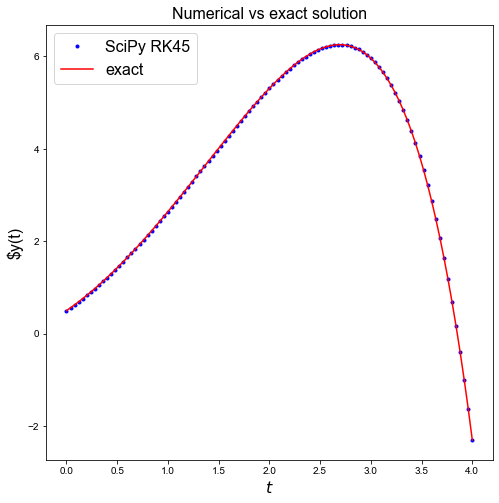

In [3]:
def f(t, y):
    return y - t**2 + 1.

def y_ex(t):
    return (t+1)**2 - np.exp(t)/2.

# initial condition
y0 = 0.5

# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 4.0
ts = np.linspace(t0, tend, N)

tol = 1.e-5
y_solve_ivp_rk45 = solve_ivp(f, [t0, tend], np.array([y0]), method='RK45', t_eval=ts, rtol=tol, atol=tol)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.plot(ts, y_solve_ivp_rk45.y[0,:], 'b.', label='SciPy RK45')
ax1.plot(ts, y_ex(ts), 'r', label='exact')
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$y(t)', fontsize=16)
ax1.set_title('Numerical vs exact solution', fontsize=16)
ax1.legend(loc='best', fontsize=16)

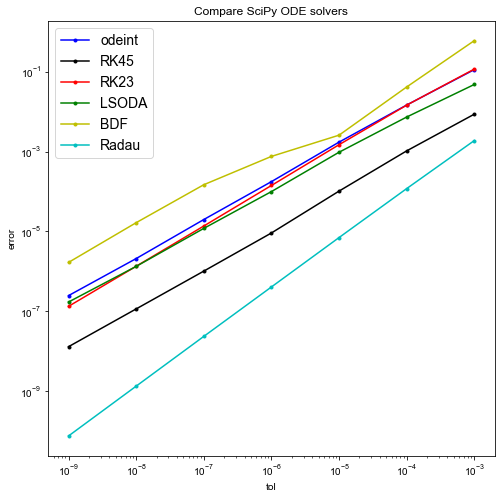

In [4]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def f(t, y):
    return y - t**2 + 1.

def y_ex(t):
    return (t+1)**2 - np.exp(t)/2.

# initial condition
y0 = 0.5

# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 4.0
ts = np.linspace(t0, tend, N)

tols = np.array([10.**(-p) for p in np.arange(3,10)])
errors_odeint = np.zeros((len(tols)), dtype=float)
errors_rk45 = np.zeros((len(tols)), dtype=float)
errors_rk23 = np.zeros((len(tols)), dtype=float)
errors_lsoda = np.zeros((len(tols)), dtype=float)
errors_bdf = np.zeros((len(tols)), dtype=float)
errors_radau = np.zeros((len(tols)), dtype=float)

for i, tol in enumerate(tols):
    r_tol = tol
    a_tol = tol
    y_odeint = odeint(f, y0, ts, rtol=r_tol, atol=a_tol, tfirst=True)
    errors_odeint[i] = np.abs(y_odeint[-1][0] - y_ex(ts[-1]))
    y_solve_ivp_rk45 = solve_ivp(f, [t0, tend], np.array([y0]), method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk45[i] = np.abs(y_solve_ivp_rk45.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_rk23 = solve_ivp(f, [t0, tend], np.array([y0]), method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk23[i] = np.abs(y_solve_ivp_rk23.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_lsoda = solve_ivp(f, [t0, tend], np.array([y0]), method='LSODA', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_lsoda[i] = np.abs(y_solve_ivp_lsoda.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_bdf = solve_ivp(f, [t0, tend], np.array([y0]), method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_bdf[i] = np.abs(y_solve_ivp_bdf.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_radau = solve_ivp(f, [t0, tend], np.array([y0]), method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_radau[i] = np.abs(y_solve_ivp_radau.y[0][-1] - y_ex(ts[-1]))

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.loglog(tols, errors_odeint, 'b.-', label='odeint')
ax1.loglog(tols, errors_rk45, 'k.-', label='RK45')
ax1.loglog(tols, errors_rk23, 'r.-', label='RK23')
ax1.loglog(tols, errors_lsoda, 'g.-', label='LSODA')
ax1.loglog(tols, errors_bdf, 'y.-', label='BDF')
ax1.loglog(tols, errors_radau, 'c.-', label='Radau')
ax1.set_xlabel('tol')
ax1.set_ylabel('error')
ax1.set_title('Compare SciPy ODE solvers')
ax1.legend(loc='best', fontsize=14)

## Homework - The van der Pol problem

Consider now the van der Pol oscillator problem which can be used to model electrical circuits.


For background see:

<https://en.wikipedia.org/wiki/Van_der_Pol_oscillator>

<http://mathworld.wolfram.com/vanderPolEquation.html>

<https://archimede.dm.uniba.it/~testset/problems/vdpol.php>


This second-order problem can be written as the first-order system

$$ y_1' = y_2, \;\;\;\; y_2' = \mu (1 - y_1^2)y_2 - y_1,$$

where $\mu$ is a parameter we can vary to change the characteristics of the problem. Start with a value of $\mu = 100$, and you could then try making this smaller/larger (but be careful about making it much larger as the problem becomes stiff and our solvers not designed to handle stiff problems start taking a very long time to complete! Refer to the final questions which consider errors vs CPU times for non-stiff and then stiff problem).

Consider a case with initial condition $y_1 = 2$ and $y_2=0$, and integrate up to time $t=2\mu$.

Repeat the error vs tolerance analysis from the previous question.

To compute the error use a Radau solver with a very tight tolerance.

### Solution - The van der Pol problem

0
1
2
3
4
5


Text(0.5, 1.0, 'Numerical solution')

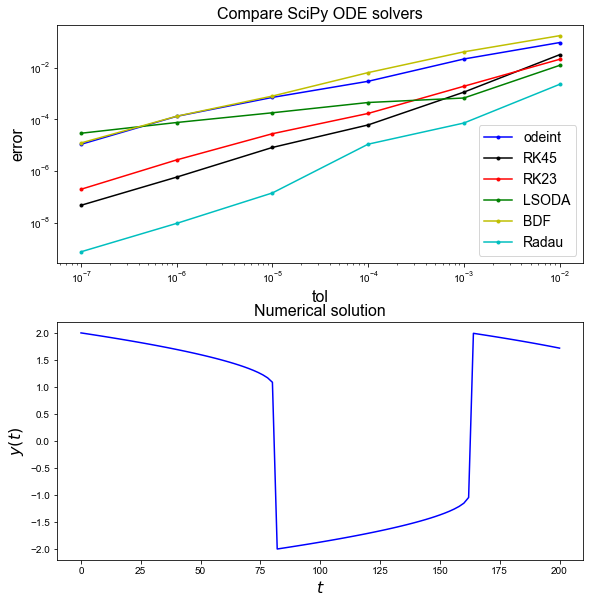

In [5]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

mu = 1.e2

def f(t, y):
    rhs = np.zeros_like(y)
    rhs[0] = y[1]
    rhs[1] = mu * (1. - y[0]**2.) * y[1] - y[0]
    return rhs

# initial condition
y0 = np.array([2.,0.])
    
# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 2*mu
ts = np.linspace(t0, tend, N)


# benchmark data in case mu = 1e3
# from https://archimede.dm.uniba.it/~testset/report/vdpol.pdf
y_ex = np.array([0.1706167732170469e1,
                -0.8928097010248125e-3])

# compute a benchmark solution for general mu
y_solve_ivp_radau = solve_ivp(f, [t0, tend], y0, method='Radau', t_eval=ts, rtol=1.e-10, atol=1.e-10)
y_ex = y_solve_ivp_radau.y[:,-1]

tols = np.array([10.**(-p) for p in np.arange(2,8)])
errors_odeint = np.zeros((len(tols)), dtype=float)
errors_rk45 = np.zeros((len(tols)), dtype=float)
errors_rk23 = np.zeros((len(tols)), dtype=float)
errors_lsoda = np.zeros((len(tols)), dtype=float)
errors_bdf = np.zeros((len(tols)), dtype=float)
errors_radau = np.zeros((len(tols)), dtype=float)

for i, tol in enumerate(tols):
    print(i)
    r_tol = tol
    a_tol = tol
    y_odeint = odeint(f, y0, ts, rtol=r_tol, atol=a_tol, tfirst=True)
    errors_odeint[i] = np.linalg.norm(y_odeint[-1,:] - y_ex)
    y_solve_ivp_rk45 = solve_ivp(f, [t0, tend], y0, method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk45[i] = np.linalg.norm(y_solve_ivp_rk45.y[:,-1] - y_ex)
    y_solve_ivp_rk23 = solve_ivp(f, [t0, tend], y0, method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk23[i] = np.linalg.norm(y_solve_ivp_rk23.y[:,-1] - y_ex)
    y_solve_ivp_lsoda = solve_ivp(f, [t0, tend], y0, method='LSODA', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_lsoda[i] = np.linalg.norm(y_solve_ivp_lsoda.y[:,-1] - y_ex)
    y_solve_ivp_bdf = solve_ivp(f, [t0, tend], y0, method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_bdf[i] = np.linalg.norm(y_solve_ivp_bdf.y[:,-1] - y_ex)
    y_solve_ivp_radau = solve_ivp(f, [t0, tend], y0, method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_radau[i] = np.linalg.norm(y_solve_ivp_radau.y[:,-1] - y_ex)

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8, 8))
fig.tight_layout(h_pad=4)
ax1.loglog(tols, errors_odeint, 'b.-', label='odeint')
ax1.loglog(tols, errors_rk45, 'k.-', label='RK45')
ax1.loglog(tols, errors_rk23, 'r.-', label='RK23')
ax1.loglog(tols, errors_lsoda, 'g.-', label='LSODA')
ax1.loglog(tols, errors_bdf, 'y.-', label='BDF')
ax1.loglog(tols, errors_radau, 'c.-', label='Radau')
ax1.set_xlabel('tol', fontsize=16)
ax1.set_ylabel('error', fontsize=16)
ax1.set_title('Compare SciPy ODE solvers', fontsize=16)
ax1.legend(loc='best', fontsize=14)

ax2.plot(ts, y_solve_ivp_radau.y[0,:], 'b')
ax2.set_xlabel('$t$', fontsize=16)
ax2.set_ylabel('$y(t)$', fontsize=16)
ax2.set_title('Numerical solution', fontsize=16)

<div class="optional">

## Homework - L-stability [$\star$]

From the lecture (the discussion on L-stability), consider the problem

$$y'(t) = \lambda(y - \cos(t)) - \sin(t), \;\;\;\; y(0) = y_0.$$

The exact solution to this problem is 

$$y(t) = \text{e}^{\lambda t}(y_0 - 1) + \cos(t).$$

Write some code that time steps this problem with the initial condition $y_0=1.5$ using both the backward Euler and the trapezoidal schemes. 

Note that since this is a scalar linear problem, we can just rearrange our implicit schemes for this problem to arrive at updates of the form `y[n+1] = ...` where the RHS of the expression contains things we know, meaning you do not have to call a nonlinear solver.

Try to choose values of $\lambda$ the give the behaviour for the two schemes as presented in the image in the L-stability section of the lecture.

Verify the claims we made in the lecture: "Note that reducing the time step does not help. But this problem with the trapezoidal scheme does not manifest if we start with the initial condition $y_0=1$."

</div>

### Solution - L-stability

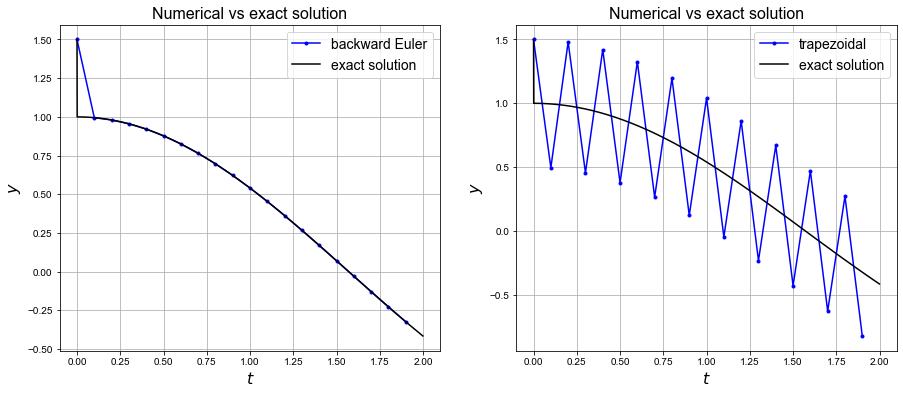

In [6]:
# a large negative eigenvalue
lam = -1.e6

# an initial condition which does not start from the "smooth" solution
y0 = 1.5


# set some numerical (time-stepping) parameters
dt = 0.1
tend = 2.

# define our time levels with a fixed dt
t = np.arange(0, tend, dt)

# initialise an array to store all solution values (for later plotting)
y_be = np.empty(len(t))
y_tr = np.empty(len(t))

# and set the first entry in array to the initial condition
y_be[0] = y0
y_tr[0] = y0

# timestep
for n in range(len(t)-1):
    # as our problem here is scalar and linear we can just rearrange the BE scheme to yield the explicit update
    y_be[n+1] = ( y_be[n] + dt * ( -lam * np.cos(t[n+1]) - np.sin(t[n+1])) )  / ( 1. - lam * dt )    
    # and similarly for TR
    y_tr[n+1] = ( y_tr[n] + 0.5 * dt * ( lam * (y_tr[n] - np.cos(t[n])) - np.sin(t[n]) ) + 
                 0.5 * dt * ( -lam * np.cos(t[n+1]) - np.sin(t[n+1])) ) / ( 1. - 0.5 * lam * dt )      

# now plot the two solutions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.plot(t, y_be, 'b.-', label='backward Euler')
ax2.plot(t, y_tr, 'b.-', label='trapezoidal')

def yex(t, y0):
    return np.exp(lam * t) * (y0 - 1.) + np.cos(t)

# add the exact solution
t_fine = np.arange(0, tend, dt/100)
ax1.plot(t_fine, yex(t_fine, y0), 'k', label='exact solution')
ax2.plot(t_fine, yex(t_fine, y0), 'k', label='exact solution')
ax1.set_xlabel(r'$t$', fontsize = 16)
ax1.set_ylabel(r'$y$', fontsize = 16)
ax1.set_title('Numerical vs exact solution', fontsize = 16)
ax1.grid(True)
ax1.legend(loc='best', fontsize = 14)
ax2.legend(loc='best', fontsize = 14)
ax2.set_xlabel(r'$t$', fontsize = 16)
ax2.set_ylabel(r'$y$', fontsize = 16)
ax2.set_title('Numerical vs exact solution', fontsize = 16)
ax2.grid(True)
ax2.legend(loc='best', fontsize = 14)

#fig.savefig('L-stability_example.png', dpi=600, format='png', facecolor='w', edgecolor='w')

## Homework - Implementing Runge-Kutta 4 stage method (RK4)

Write a general Python function that implements the classical RK4 method for a given RHS function, and apply it to the problem we used previously to compare the errors between forward Euler and improved Euler (recalling that we can interpret IE as a predictor-corrector LMS pair, or as a Runge-Kutta method RK2($\alpha=1$)):

$$y'(t)=y,\;\;\; y(0)=1,$$

and where we evaluate the error at the time $t = 2\pi$.

### Solution - Implementing Runge-Kutta 4 stage method (RK4)

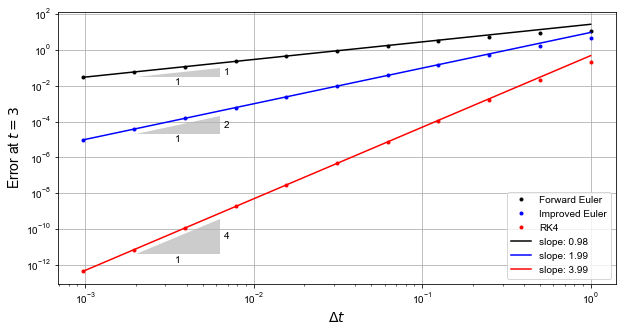

In [7]:
def f(t, y):
    val = y
    return val

def RK4(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)



# problem parameters
dt = 0.04
u0 = 1.0
t0 = 0.0
tf = 2*np.pi

def approx_error(dt, t_max):
    uall, tall = forward_euler(f, u0, t0, t_max, dt)
    err1 = abs(uall[-1]-np.exp(t_max))
    uall, tall = improved_euler(f, u0, t0, t_max, dt)
    err2 = abs(uall[-1]-np.exp(t_max))
    uall, tall = RK4(f, u0, t0, t_max, dt)
    err3 = abs(uall[-1]-np.exp(t_max))
    return err1, err2, err3


error_fe = []
error_ie = []
error_rk4 = []
dt_array = []
dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2, err3 = approx_error(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)
    error_rk4.append(err3)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.loglog(dt_array, error_rk4, 'r.', label='RK4')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_rk4 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk4[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(dt_array, np.exp(line_fit_rk4[1]) * dt_array**(line_fit_rk4[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_rk4[0]))

annotation.slope_marker((2e-3, 3e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 2e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 4e-12), (4, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best')

# save figure to use in lecture
#fig.savefig('RK4-comparison.png', dpi=600, format='png', facecolor='w', edgecolor='w')

## Homework - Implementing Adams-Bashforth 4-step method (AB4)

In the lecture we derived AB2 by choosing our free parameters ($\beta_0\,$ and $\,\beta_1$) such that we could integrate exactly the monomials $f(t) = 1$ and $f(t)=t$. This led to two simultaneous equations we could trivially solve.

Try extending this to the case of AB4 - now we have four free parameters ($\beta_0, \ldots, \beta_3$) and we need to integrate polynomials up to degree 3 exactly.

Derive the corresponding system of 4 equations for 4 unknowns.

**[Hint**: your life will be easier when computing the integrals if you consider a polynomial basis of the form $P_{N+1}(t) = t (t + \Delta t) \dots (t + N\Delta t)$

(note that this is consistent with what we did for AB2, but now we aren't using monomials any more for $N>1$, i.e. additionally consider the cases $f(t)=t(t+\Delta t)$ and $f(t)=t(t+\Delta t)(t+2\Delta t)$).


Can you see where this hint came from - why is this a convenient choice, if again as per the AB2 derivation in the lecture we assume $t_{n+1} = \Delta t,\; t_n = 0$, $t_{n-1} = -\Delta t$, $t_{n-2} = -2\Delta t$, ...?


Write a script which forms and solves the resulting linear system for the AB coefficients, for $k=4$.

Check your coefficients agree with those given in the lecture, e.g. with something like

```python
AB4_beta = np.linalg.solve(LHS_A, RHS_b)  
print('Our calculated AB4 coefficients: ',AB4_beta)
print('Our coefficient agree with what we wrote in the lecture: ',np.allclose(AB4_beta, np.array([ 55./24., -59./24., 37./24., -9./24.])))
```
**]**


and then implement and verify the method following the implementation and convergence approach taken in the homework exercise from the previous lecture (`Homework: Improved Euler and accuracy comparison with forward Euler`).

As the scheme isn't self-starting use the appropriate number of time steps from an appropriate order RK method to start things off.

### Solution - Implementing Adams-Bashforth 4-step method (AB4)

We now have a scheme in the form (a 4 step scheme)

$$y_{n+1} - y_n = \Delta t \left( \beta_3 f_{n} + \beta_2 f_{n-1} + \beta_1 f_{n-2} + \beta_0 f_{n-3} \right).$$

We want the following to hold for polynomials up to degree 3 in $t$

$$\int_{t_{n}}^{t_{n+1}} {f}(t,{y}(t))\, dt = \Delta t \left( \beta_3 f_{n} + \beta_2 f_{n-1} + \beta_1 f_{n-2} + \beta_0 f_{n-3} \right).$$

As per the hint, let's consider  

$$f(t,y(t)):=P_{N+1}(t) = t (t + \Delta t) \dots (t + N\Delta t),$$ 

as well as 

$$t_{n+1} := \Delta t,\;\;\;\; 
t_n := 0, \;\;\;\; 
t_{n-1} := -\Delta t,\;\;\;\; 
t_{n-2} := -2\Delta t, \ldots$$

We will see in the derivation below why these are particularly convenient choices.

We thus have the following conditions to be satisfied:

\begin{align*}
f(t):= 1: \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} \, dt  = \Delta t \\[5pt]
RHS &= \Delta t \left[ \beta_3 + \beta_2 + \beta_1 + \beta_0 \right]\\[15pt]
%
f(t):= t: \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} t\, dt  = \frac{\Delta t^2}{2}  \\[5pt]
RHS &= \Delta t \left( \beta_3 f(0) + \beta_2 f(-\Delta t) + \beta_1 f(-2\Delta t) + \beta_0 f(-3\Delta t)\right)\\[5pt]
&= \Delta t \left[ -\Delta t \left(  \beta_2  + 2 \beta_1  + 3 \beta_0 \right) \right] \\[5pt]
&= \Delta t^2 \left[ -\beta_2  -2 \beta_1  -3 \beta_0 \right]\\[15pt]
%
f(t):=  t(t+\Delta t): \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} f(t)\, dt  = 5\frac{\Delta t^3}{6}  \\[5pt]
RHS &= \Delta t \left( \beta_3 f(0) + \beta_2 f(-\Delta t) + \beta_1 f(-2\Delta t) + \beta_0 f(-3\Delta t)\right)\\[5pt]
&= \Delta t \left[    -2 \Delta t(-2\Delta t +\Delta t) \beta_1  -3\Delta t(-3\Delta t +\Delta t) \beta_0  \right] \\[5pt]
&= \Delta t^3 \left[  2 \beta_1  + 6 \beta_0  \right] \\[15pt]
%
f(t):=  t(t+\Delta t)(t+2\Delta t): \;\;\;\; 
LHS & = \int_{t_{n}}^{t_{n+1}} f(t)\, dt  = 9\frac{\Delta t^4}{4}  \\[5pt]
RHS &= \Delta t \left( \beta_3 f(0) + \beta_2 f(-\Delta t) + \beta_1 f(-2\Delta t) + \beta_0 f(-3\Delta t)\right)\\[5pt]
&= \Delta t \left[   -3\Delta t(-3\Delta t +\Delta t)(-3\Delta t + 2\Delta t) \beta_0  \right] \\[5pt]
&= \Delta t^4 \left[  -6 \beta_0  \right] 
\end{align*}


which yields the linear system

$$
\begin{pmatrix}
1 & 1 & 1 & 1 \\
0 & -1 & -2 & -3 \\
0 & 0 & 2 & 6 \\
0 & 0 & 0 & -6 
\end{pmatrix}
\begin{pmatrix}
\beta_3 \\
\beta_2\\
\beta_1\\
\beta_0
\end{pmatrix}
=
\begin{pmatrix}
1\\
1/2\\
5/6\\
9/4
\end{pmatrix}
$$


In [8]:
LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
RHS_b = np.array([1., 1./2., 5./6., 9./4.])
AB4_beta = np.linalg.solve(LHS_A, RHS_b)  
print('Our calculated AB4 coefficients: ',AB4_beta)
print('Our coefficient agree with what we wrote in the lecture: ',np.allclose(AB4_beta, np.array([ 55./24., -59./24., 37./24., -9./24.])))

Our calculated AB4 coefficients:  [ 2.29166667 -2.45833333  1.54166667 -0.375     ]
Our coefficient agree with what we wrote in the lecture:  True


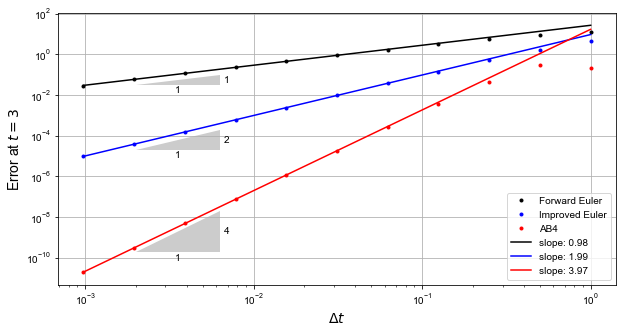

In [9]:
def f(t, y):
    val = y
    return val

def AB4(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0] 

    # scheme is not self-starting so we need to so something else until we have the first
    # 3 discrete values - e.g. a sufficiently high order RK method, or lower-order method
    # with small enough time step
    
    # how you would do a large number of forward euler time steps 
    # turned out to not be good enough to demonstrate full 4th order convergence
    # without very large number of smaller time steps! Improved Euler would probably have been
    # much better
    
#    factor = 10000
#    for i in range(3):
#        st = np.linspace(t, t + dt - dt/factor, factor)
#        for t in st:
#            y = y + (dt/factor) * f(t, y)
#        # store the final y from the smaller time steps
#        y_all = np.vstack((y_all,y))
#        # increment t so the next linspace starts at the right time level, as well as the proper AB4 time loop
#        t = t + dt/factor

    # do a few RK4 steps
    for n in range(3):
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
        
    # compute AB4 coefficients
    LHS_A = np.array([ [1., 1., 1., 1.], [0., -1., -2., -3.], [0., 0., 2., 6.], [0., 0., 0., -6.] ])
    RHS_b = np.array([1., 1./2., 5./6., 9./4.])
    AB4_beta = np.linalg.solve(LHS_A, RHS_b)             
    while t < t_max:
        y = y + dt * (AB4_beta[0]*f(t, y_all[-1]) + AB4_beta[1]*f(t-dt, y_all[-2]) 
                    + AB4_beta[2]*f(t-2*dt, y_all[-3]) + AB4_beta[3]*f(t-3*dt, y_all[-4]))
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi

def approx_error(dt, t_max):
    yall, tall = forward_euler(f, y0, t0, t_max, dt)
    err1 = abs(yall[-1]-np.exp(t_max))
    yall, tall = improved_euler(f, y0, t0, t_max, dt)
    err2 = abs(yall[-1]-np.exp(t_max))
    yall, tall = AB4(f, y0, t0, t_max, dt)
    err3 = abs(yall[-1]-np.exp(t_max))
    return err1, err2, err3


error_fe = []
error_ie = []
error_ab4 = []
dt_array = []
dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2, err3 = approx_error(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)
    error_ab4.append(err3)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.loglog(dt_array, error_ab4, 'r.', label='AB4')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_ab4 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ab4[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(dt_array, np.exp(line_fit_ab4[1]) * dt_array**(line_fit_ab4[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_ab4[0]))

annotation.slope_marker((2e-3, 3e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 2e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 2e-10), (4, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best')

<div class="advanced">

## Homework - Adaptive time stepping (implementing RK45 - the Dormand-Prince embedded RK pair) [$\star\star$]

Try implementing the Dormand and Price embedded RK pair (<https://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method>) with adaptive time stepping.

[Given 4th and 5th order approximations to the solution at the new time level (`y4` and `y5`), the error control component of the method can be written something like

```Python
        # error control
        e = np.linalg.norm(y5 - y4)/np.sqrt(y.size)
        dt_next = 0.9 * (tol/e)**(1./5.) * dt
        if e < tol:
            y = y5
            y_all.append(y)
            t = t + dt
            t_all.append(t) 
        dt = dt_next
```
where $e$ is an estimate of the local error obtained as the norm of the difference between the two numerical solutions and 0.9 is a safety factor. Note that additional factors can easily be incorporated to limit how rapidly the time step size is allowed to increase or decrease. We haven't bothered to do this here and this is why our dt's don't quite match those obtained with SciPy.

For more information on this if interested see Chapter II.4 (Practical Error Estimation and Step Size Selection) of *Solving Ordinary Differential Equations I: Nonstiff Problems* by Hairer, Nørsett and Wanner.]

To make your life easier the entries of the Butcher tableau for the scheme are given in the following cell.

Test the solver of one of the problems we have seen before.

You should also test that your implementation works for both scalar and vector problems.

</div>

In [10]:
a21 = 1. / 5.

a31 = 3. / 40.
a32 = 9. / 40.

a41 = 44. / 45.
a42 = -56. / 15.
a43 = 32. / 9.

a51 =  19372. / 6561.
a52 = -25360. / 2187.
a53 = 64448. / 6561.
a54 = -212. / 729.

a61 = 9017. / 3168.
a62 = -355. / 33.
a63 = 46732. / 5247.0
a64 = 49. / 176.
a65 = -5103. / 18656.

a71 = 35. / 384.
a72 = 0.
a73 = 500. / 1113.
a74 = 125. / 192.
a75 = -2187. / 6784.
a76 = 11. / 84.

c2 = 1. / 5.
c3 = 3. / 10.
c4 = 4. / 5.
c5 = 8. / 9.
c6 = 1.
c7 = 1.

b1a = 35. / 384.
b2a = 0.
b3a = 500. / 1113.
b4a = 125. / 192.
b5a = -2187. / 6784.0
b6a = 11. / 84.0
b7a = 0.0

b1b = 5179. / 57600.0
b2b = 0.0
b3b = 7571. / 16695.0
b4b = 393. / 640.0
b5b = -92097. / 339200.
b6b = 187. / 2100.
b7b = 1. / 40.

### Solution - Adaptive time stepping (implementing RK45 - the Dormand-Prince embedded RK pair)

In [11]:
a21 = 1. / 5.

a31 = 3. / 40.
a32 = 9. / 40.

a41 = 44. / 45.
a42 = -56. / 15.
a43 = 32. / 9.

a51 =  19372. / 6561.
a52 = -25360. / 2187.
a53 = 64448. / 6561.
a54 = -212. / 729.

a61 = 9017. / 3168.
a62 = -355. / 33.
a63 = 46732. / 5247.0
a64 = 49. / 176.
a65 = -5103. / 18656.

a71 = 35. / 384.
a72 = 0.
a73 = 500. / 1113.
a74 = 125. / 192.
a75 = -2187. / 6784.
a76 = 11. / 84.

c2 = 1. / 5.
c3 = 3. / 10.
c4 = 4. / 5.
c5 = 8. / 9.
c6 = 1.
c7 = 1.

b1a = 35. / 384.
b2a = 0.
b3a = 500. / 1113.
b4a = 125. / 192.
b5a = -2187. / 6784.0
b6a = 11. / 84.0
b7a = 0.0

b1b = 5179. / 57600.0
b2b = 0.0
b3b = 7571. / 16695.0
b4b = 393. / 640.0
b5b = -92097. / 339200.
b6b = 187. / 2100.
b7b = 1. / 40.

def RK45(f, y0, t0, t_max, dt, tol):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]               
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + c2*dt, y + a21*k1)
        k3 = dt*f(t + c3*dt, y + a31*k1 + a32*k2)
        k4 = dt*f(t + c4*dt, y + a41*k1 + a42*k2 + a43*k3)
        k5 = dt*f(t + c5*dt, y + a51*k1 + a52*k2 + a53*k3 + a54*k4)
        k6 = dt*f(t + c6*dt, y + a61*k1 + a62*k2 + a63*k3 + a64*k4 + a65*k5)
        k7 = dt*f(t + c7*dt, y + a71*k1 + a72*k2 + a73*k3 + a74*k4 + a75*k5 + a76*k6)
        y5 = y + b1a*k1 + b2a*k2 + b3a*k3 + b4a*k4 + b5a*k5 + b6a*k6 +b7a*k7
        y4 = y + b1b*k1 + b2b*k2 + b3b*k3 + b4b*k4 + b5b*k5 + b6b*k6 +b7b*k7
        # error control
        e = np.linalg.norm(y5 - y4)/np.sqrt(y.size)
        dt_next = 0.9 * (tol/e)**(1./5.) * dt
        if e < tol:
            y = y5
            y_all.append(y)
            t = t + dt
            t_all.append(t) 
        dt = dt_next
    return np.array(y_all), np.array(t_all)

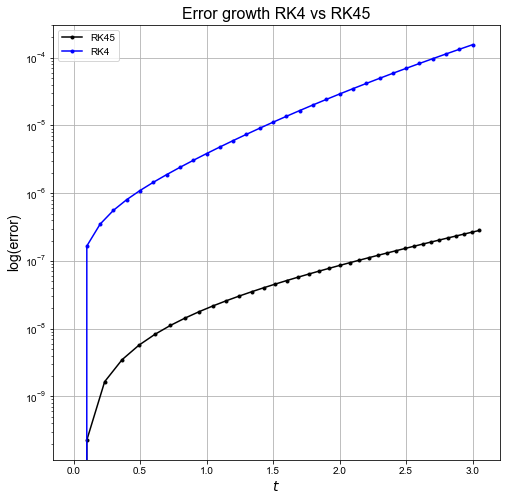

In [12]:
def f(t, y):
    return y + t**3

def y(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

# problem parameters
t0 = 0.0
y0 = y(t0)
t_max = 3.
dt = 0.1
tol = 1.e-7

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

yall, tall = RK45(f, y0, t0, t_max, dt, tol)
ax1.semilogy(tall, np.abs(yall - y(tall)), 'k.-', label='RK45')

yall, tall = RK4(f, y0, t0, t_max, dt)
ax1.semilogy(tall, np.abs(yall - y(tall)), 'b.-', label='RK4')

ax1.set_xlabel(r'$t$', fontsize=14)
ax1.set_ylabel('log(error)', fontsize=14)
ax1.set_title('Error growth RK4 vs RK45', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best')

## Homework - The Lorenz system (with RK4 and RK45)

Repeat the Lorenz system exercise from the previous lecture's homework using our new RK4 and RK45 solvers.

### Solution - The Lorenz system  (with RK4 and RK45)

Text(0.5, 0.92, 'Lorenz system')

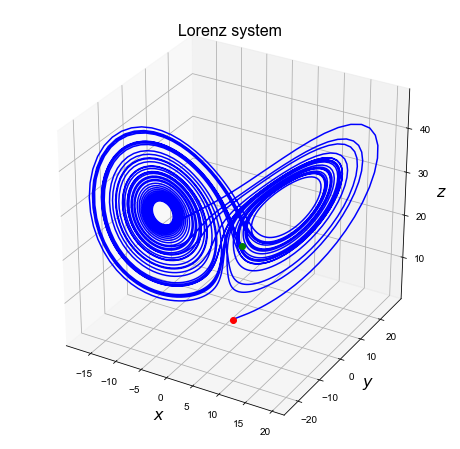

In [13]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# problem parameters
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(t, state):
    """ RHS function for Lorenz system
    """
    f = np.zeros_like(state)
    # unpack the state vector
    x, y, z = state  
    f[0] = sigma * (y - x)
    f[1] = x * (rho - z) - y
    f[2] = x * y - beta * z
    return f

# initial condition
state0 = np.array([1.0, 1.0, 1.0])

# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
dt = 0.01
t0 = 0.
tend = 40.
t = np.arange(t0, tend, dt)

# solve using SciPy to strict tolerance
tol = 1.e-12
y_solve_ivp_rk45 = solve_ivp(f, [t0, tend], state0, method='RK45', t_eval=t, rtol=tol, atol=tol)
states = y_solve_ivp_rk45.y
# transpose to reuse code from last lecutre
states = states.T

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot(states[:, 0], states[:, 1], states[:, 2], 'b')
ax1.plot( [states[0, 0]], [states[0, 1]], [states[0, 2]], 'ro')
ax1.plot( [states[-1, 0]], [states[-1, 1]], [states[-1, 2]], 'go')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system', fontsize = 16)

Text(0.5, 1.0, 'Lorenz system: SciPy - RK45')

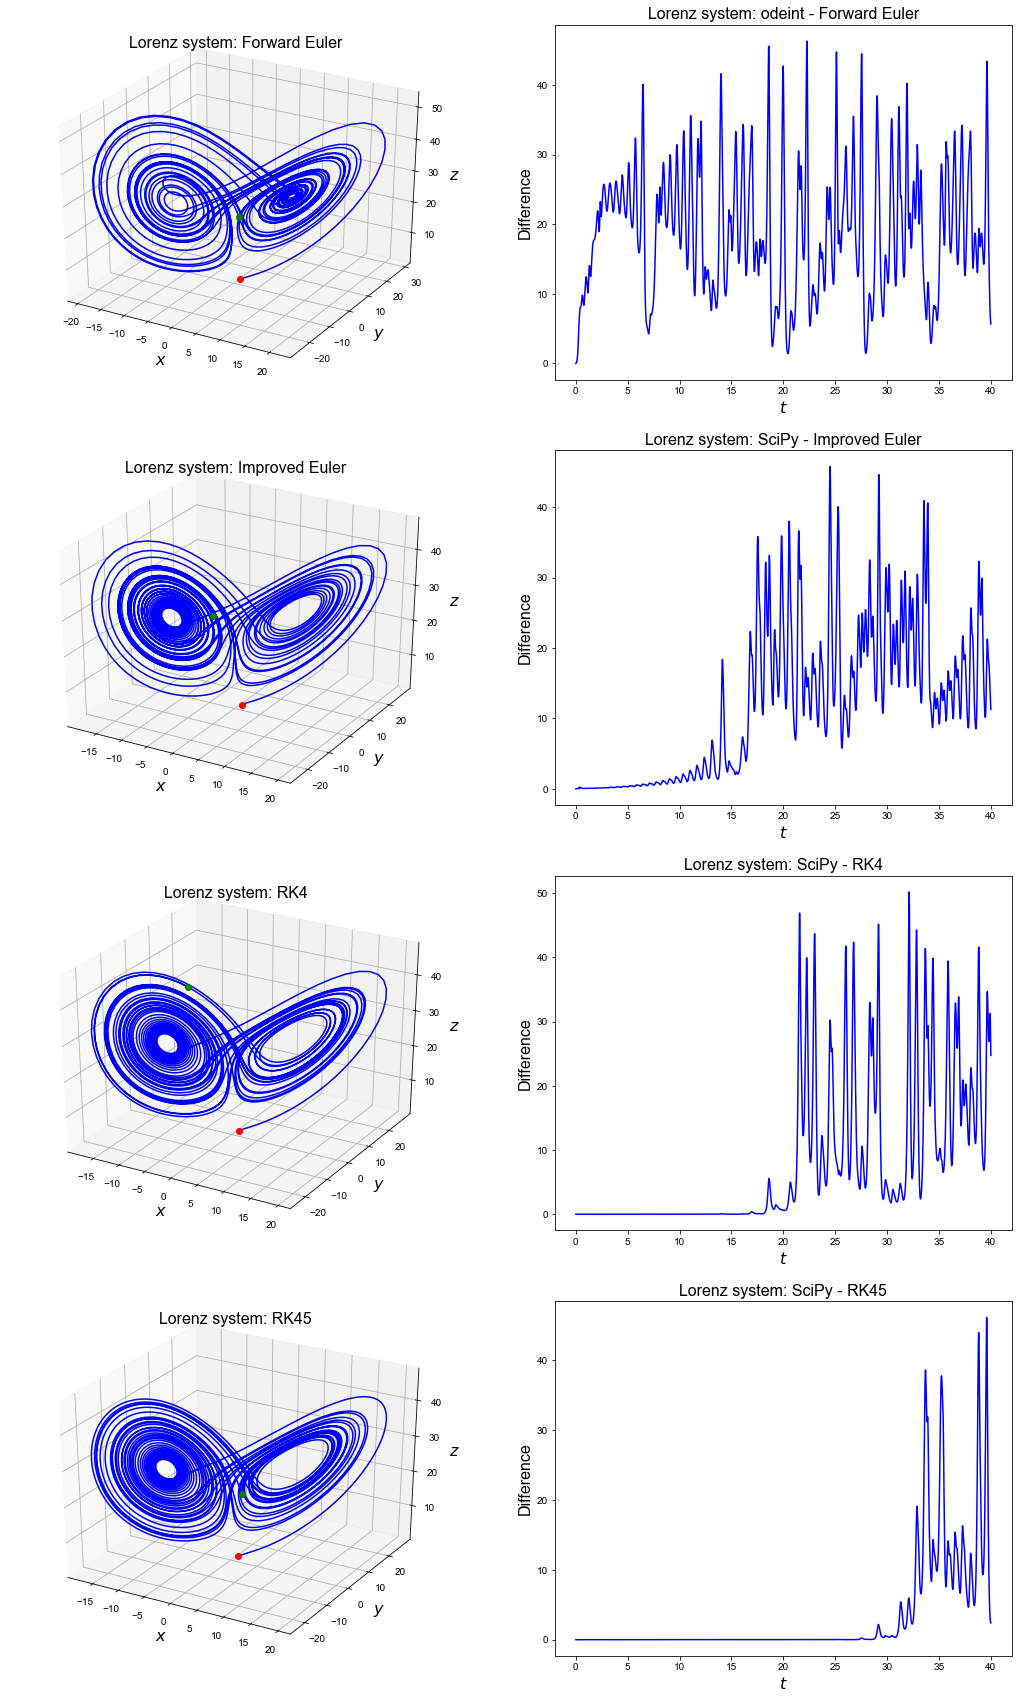

In [14]:
# let's test our own solver functions

def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

# initial condition
state0 = [1.0, 1.0, 1.0]

states_fe, t_fe = forward_euler(f, state0, 0., 40.0, 0.01)

states_ie, t_ie = improved_euler(f, state0 , 0., 40.0, 0.01)


fig = plt.figure(figsize=(18, 30))

ax1 = fig.add_subplot(4, 2, 1, projection='3d')
ax1.plot(states_fe[:, 0], states_fe[:, 1], states_fe[:, 2], 'b')
ax1.plot( [states_fe[0, 0]], [states_fe[0, 1]], [states_fe[0, 2]], 'ro')
ax1.plot( [states_fe[-1, 0]], [states_fe[-1, 1]], [states_fe[-1, 2]], 'go')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system: Forward Euler', fontsize = 16)

ax1 = fig.add_subplot(4, 2, 2)

ax1.plot(t, np.linalg.norm(states - states_fe[:-1,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title('Lorenz system: odeint - Forward Euler', fontsize = 16)

ax1 = fig.add_subplot(4, 2, 3, projection='3d')

ax1.plot(states_ie[:, 0], states_ie[:, 1], states_ie[:, 2], 'b')
ax1.plot( [states_ie[0, 0]], [states_ie[0, 1]], [states_ie[0, 2]], 'ro')
ax1.plot( [states_ie[-1, 0]], [states_ie[-1, 1]], [states_ie[-1, 2]], 'go')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system: Improved Euler', fontsize = 16)

ax1 = fig.add_subplot(4, 2, 4)

ax1.plot(t, np.linalg.norm(states - states_ie[:-1,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title('Lorenz system: SciPy - Improved Euler', fontsize = 16)


states_rk4, t_rk4 = RK4(f, state0 , 0., 40.0, 0.01)

ax1 = fig.add_subplot(4, 2, 5, projection='3d')

ax1.plot(states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2], 'b')
ax1.plot( [states_rk4[0, 0]], [states_rk4[0, 1]], [states_rk4[0, 2]], 'ro')
ax1.plot( [states_rk4[-1, 0]], [states_rk4[-1, 1]], [states_rk4[-1, 2]], 'go')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system: RK4', fontsize = 16)

ax1 = fig.add_subplot(4, 2, 6)

ax1.plot(t, np.linalg.norm(states - states_rk4[:-1,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title('Lorenz system: SciPy - RK4', fontsize = 16)

states_rk45, t_rk45 = RK45(f, state0, 0., 40., 0.01, tol=1.e-10)

# recompute SciPy solution, with outputs at our RK45 time steps
# solve using SciPy to strict tolerance
tol = 1.e-12
y_solve_ivp_rk45 = solve_ivp(f, [t0, tend+1], state0, method='RK45', t_eval=t_rk45, rtol=tol, atol=tol)
states = y_solve_ivp_rk45.y
# transpose to reuse code from last lecture
states = states.T


ax1 = fig.add_subplot(4, 2, 7, projection='3d')

ax1.plot(states_rk45[:, 0], states_rk45[:, 1], states_rk45[:, 2], 'b')
ax1.plot( [states_rk45[0, 0]], [states_rk45[0, 1]], [states_rk45[0, 2]], 'ro')
ax1.plot( [states_rk45[-1, 0]], [states_rk45[-1, 1]], [states_rk45[-1, 2]], 'go')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system: RK45', fontsize = 16)

ax1 = fig.add_subplot(4, 2, 8)

ax1.plot(t_rk45, np.linalg.norm(states - states_rk45[:,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title('Lorenz system: SciPy - RK45', fontsize = 16)

<div class="optional">

## Homework - Perturbing initial conditions (in the Lorenz problem) [$\star$]

In order to think about how long we can reasonably expect to follow a complex trajectory such as in the Lorenz system before we start to see divergence, see what happens if you start two simulations with slightly different initial conditions. i.e. perturb your initial condition using a small random vector and track how the trajectories diverge.

I suggest you try this with RK4.

</div>

### Solution - Perturbing initial conditions (in the Lorenz problem)

[1.00177374 1.0012749  1.00158994]


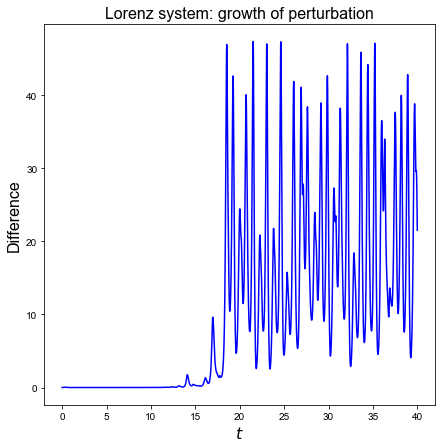

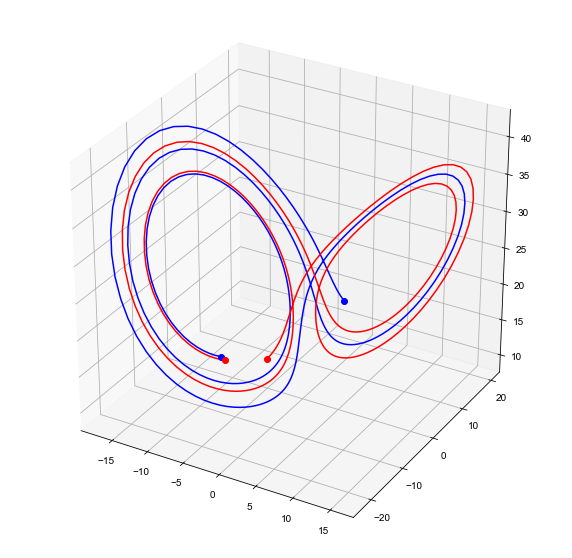

In [15]:
# initial condition
state0_a = [1.0, 1.0, 1.0]
states_rk4_a, t_rk4_a = RK4(f, state0_a, 0., 40., 0.01)

# give it a small perturbation
epsilon = 2.e-3
state0_b = [1.0, 1.0, 1.0] + epsilon * np.random.rand(3)
print(state0_b)
states_rk4_b, t_rk4_b = RK4(f, state0_b, 0., 40., 0.01)


fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))
ax1.plot(t_rk4_a, np.linalg.norm(states_rk4_a[:,:] - states_rk4_b[:,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title('Lorenz system: growth of perturbation', fontsize = 16)

# based upon when we see divergence in this plot, let's plot the trajectories only
# around this period

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

ts = np.arange(1600, 1900)

ax1.plot(states_rk4_a[ts, 0], states_rk4_a[ts, 1], states_rk4_a[ts, 2], 'b')
ax1.plot(states_rk4_b[ts, 0], states_rk4_b[ts, 1], states_rk4_b[ts, 2], 'r')
ax1.plot( [states_rk4_a[ts[0], 0]], [states_rk4_a[ts[0], 1]], [states_rk4_a[ts[0], 2]], 'bo')
ax1.plot( [states_rk4_b[ts[0], 0]], [states_rk4_b[ts[0], 1]], [states_rk4_b[ts[0], 2]], 'ro')
ax1.plot( [states_rk4_a[ts[-1], 0]], [states_rk4_a[ts[-1], 1]], [states_rk4_a[ts[-1], 2]], 'bo')
ax1.plot( [states_rk4_b[ts[-1], 0]], [states_rk4_b[ts[-1], 1]], [states_rk4_b[ts[-1], 2]], 'ro')

<div class="optional">
    
## Homework - The Kepler problem with adaptive time stepping [$\star$]

Repeat the Kepler problem exercise from Lecture 5's homework using our own RK45 method (or alternatively Scipy's `solve_ivp` with the option `RK45`).

Plot how the time step size varies in time - does it make sense when you have larger vs smaller time steps?

See if you get agreement for the time step sizes between our and SciPy's RK45 implementation.

</div>

### Solution - The Kepler problem with adaptive time stepping

Text(0.5, 1.0, 'Planet speed as a function of time')

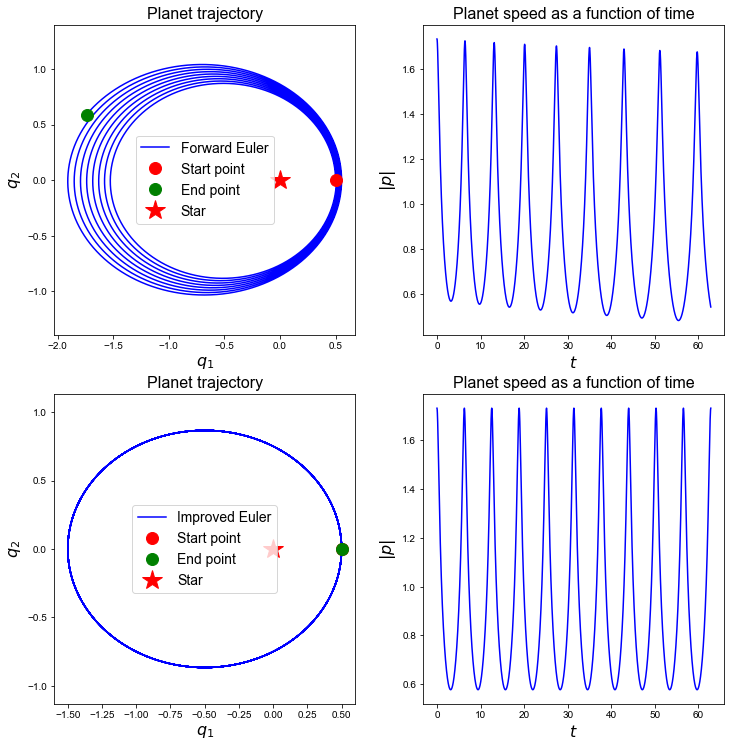

In [16]:
# this is code from L5 - homework to remind us what FE and IE did

def f_planetary(t, y):
    """ RHS function for orbital motion example.
    y = (q_1,q_2, p_1,p_1)
    The q's are the position coordinates
    and the p's are the velocity components.
    """
    f = np.zeros_like(y)
    r = np.sqrt(y[0]**2 + y[1]**2)
    f[0] = y[2]
    f[1] = y[3]
    f[2] = -y[0] / r**3 
    f[3] = -y[1] / r**3  
    return f


# Initial conditions
ecc = 0.5
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

y, t = forward_euler(f_planetary, y0, t0, tf, dt)

ax[0].plot(y[:,0], y[:,1], 'b', label='Forward Euler')
ax[0].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(t, np.sqrt( y[:,2]**2 + y[:,3]**2) ,'b')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|p|$', fontsize=16)
ax[1].set_title('Planet speed as a function of time', fontsize=16)

y, t = improved_euler(f_planetary, y0, t0, tf, dt)

ax[2].plot(y[:,0], y[:,1], 'b', label='Improved Euler')
ax[2].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[2].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[2].plot(0,0,'r*',label = 'Star', markersize=20)
ax[2].set_xlabel('$q_1$', fontsize=16)
ax[2].set_ylabel('$q_2$', fontsize=16)
ax[2].set_title('Planet trajectory', fontsize=16)
ax[2].axis('equal')
ax[2].legend(loc='best', fontsize=14)

ax[3].plot(t, np.sqrt( y[:,2]**2 + y[:,3]**2) ,'b')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|p|$', fontsize=16)
ax[3].set_title('Planet speed as a function of time', fontsize=16)


Text(0.5, 1.0, 'Planet speed as a function of time')

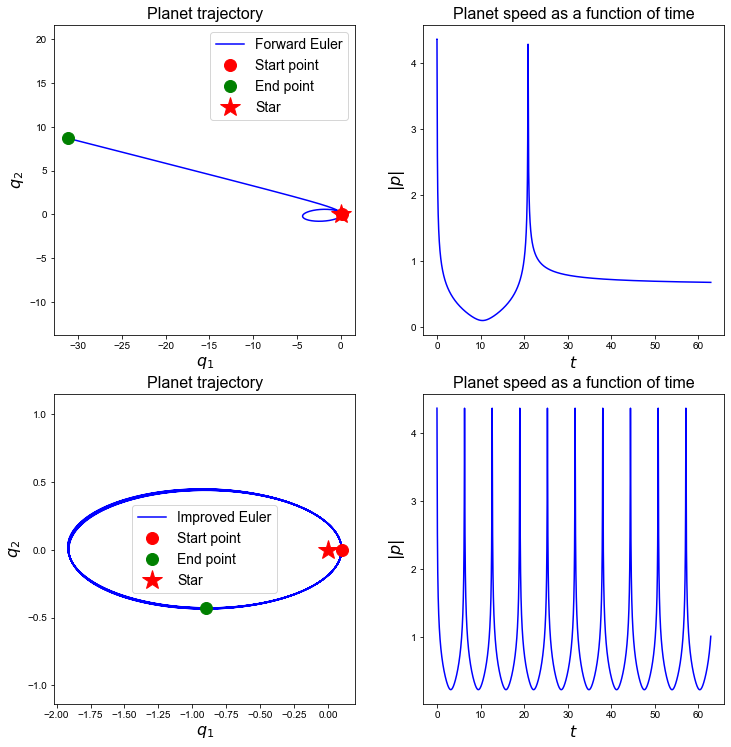

In [17]:
# Initial conditions
ecc = 0.9
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

y, t = forward_euler(f_planetary, y0, t0, tf, dt)

ax[0].plot(y[:,0], y[:,1], 'b', label='Forward Euler')
ax[0].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(t, np.sqrt( y[:,2]**2 + y[:,3]**2) ,'b')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|p|$', fontsize=16)
ax[1].set_title('Planet speed as a function of time', fontsize=16)

y, t = improved_euler(f_planetary, y0, t0, tf, dt)

ax[2].plot(y[:,0], y[:,1], 'b', label='Improved Euler')
ax[2].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[2].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[2].plot(0,0,'r*',label = 'Star', markersize=20)
ax[2].set_xlabel('$q_1$', fontsize=16)
ax[2].set_ylabel('$q_2$', fontsize=16)
ax[2].set_title('Planet trajectory', fontsize=16)
ax[2].axis('equal')
ax[2].legend(loc='best', fontsize=14)

ax[3].plot(t, np.sqrt( y[:,2]**2 + y[:,3]**2) ,'b')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|p|$', fontsize=16)

ax[3].set_title('Planet speed as a function of time', fontsize=16)

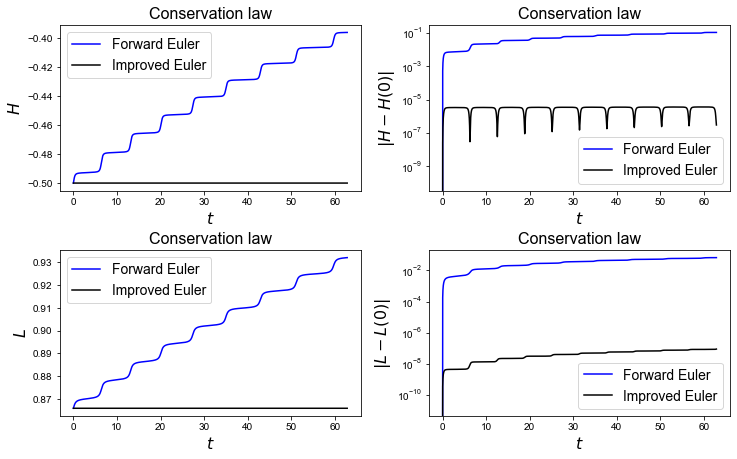

In [18]:
ecc = 0.5


def compute_Kepler_energy(y):
    H = 0.5 * (y[:,2]**2 + y[:,3]**2) - 1. / np.sqrt( y[:,0]**2 + (y[:,1]**2) )
    return H

def compute_Kepler_angular_mom(y):
    L = y[:,0]*y[:,3] - y[:,1]*y[:,2]
    return L

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi
               
y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
H_fe = compute_Kepler_energy(y_fe)
L_fe = compute_Kepler_angular_mom(y_fe)

y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
H_ie = compute_Kepler_energy(y_ie)
L_ie = compute_Kepler_angular_mom(y_ie)

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

ax[0].plot(t_fe, H_fe, 'b', label='Forward Euler')
ax[0].plot(t_ie, H_ie, 'k', label='Improved Euler')
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylabel('$H$', fontsize=16)
ax[0].set_title('Conservation law', fontsize=16)
ax[0].legend(loc='best', fontsize=14)

# a semilogy plot
ax[1].semilogy(t_fe, np.abs(H_fe - H_fe[0]), 'b', label='Forward Euler')
ax[1].semilogy(t_ie, np.abs(H_ie - H_ie[0]), 'k', label='Improved Euler')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|H - H(0)|$', fontsize=16)
ax[1].set_title('Conservation law', fontsize=16)
ax[1].legend(loc='best', fontsize=14)

ax[2].plot(t_fe, L_fe, 'b', label='Forward Euler')
ax[2].plot(t_ie, L_ie, 'k', label='Improved Euler')
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$L$', fontsize=16)
ax[2].set_title('Conservation law', fontsize=16)
ax[2].legend(loc='best', fontsize=14)

# a semilogy plot
ax[3].semilogy(t_fe, np.abs(L_fe - L_fe[0]), 'b', label='Forward Euler')
ax[3].semilogy(t_ie, np.abs(L_ie - L_ie[0]), 'k', label='Improved Euler')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|L - L(0)|$', fontsize=16)
ax[3].set_title('Conservation law', fontsize=16)
ax[3].legend(loc='best', fontsize=14)

max/min dt for RK45 (after first orbit):  0.4356220541370881 0.07771238172377792


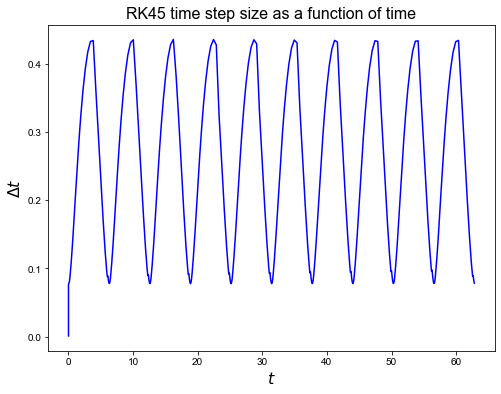

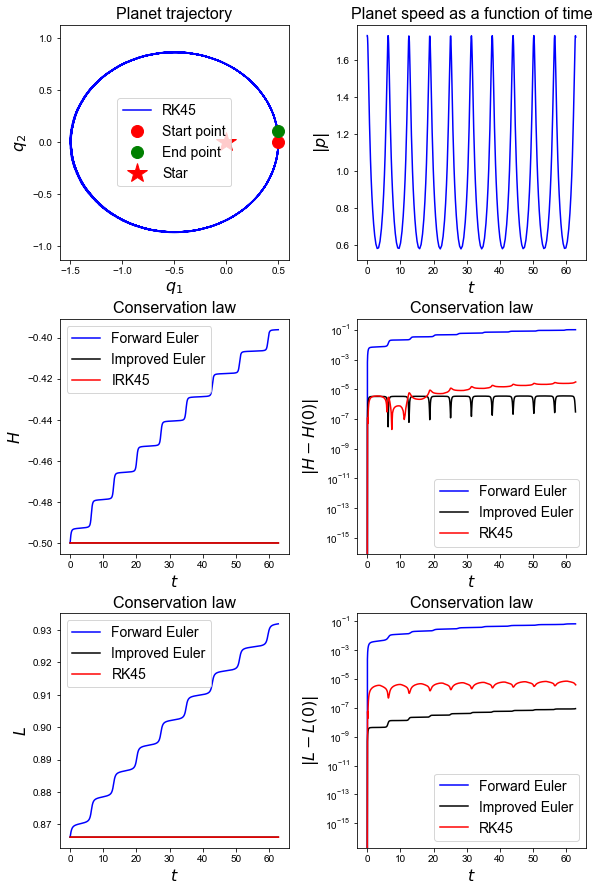

In [19]:
# apply our RK45 solver to this problem

ecc = 0.5

def f_planetary(t, y):
    """ RHS function for orbital motion example.
    y = (q_1,q_2, p_1,p_1)
    The q's are the position coordinates
    and the p's are the velocity components.
    """
    f = np.zeros_like(y)
    r = np.sqrt(y[0]**2 + y[1]**2)
    f[0] = y[2]
    f[1] = y[3]
    f[2] = -y[0] / r**3 
    f[3] = -y[1] / r**3  
    return f

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi

tol = 1.e-6

y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)

print('max/min dt for RK45 (after first orbit): ', np.max(np.diff(t_rk45[t_rk45>2.*np.pi])), 
      np.min(np.diff(t_rk45[t_rk45>2.*np.pi])))

# what do the time steps do?
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.plot(t_rk45[:-1], np.diff(t_rk45), 'b')
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$\Delta t$', fontsize=16)
ax1.set_title('RK45 time step size as a function of time', fontsize=16)

# set up figure
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
fig.tight_layout(w_pad=4, h_pad=4)
ax = axs.reshape(-1)

ax[0].plot(y_rk45[:,0], y_rk45[:,1], 'b', label='RK45')
ax[0].plot(y_rk45[0,0], y_rk45[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y_rk45[-1,0], y_rk45[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(t_rk45, np.sqrt( y_rk45[:,2]**2 + y_rk45[:,3]**2) ,'b')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|p|$', fontsize=16)
ax[1].set_title('Planet speed as a function of time', fontsize=16)


H_rk45 = compute_Kepler_energy(y_rk45)
L_rk45 = compute_Kepler_angular_mom(y_rk45)

ax[2].plot(t_fe, H_fe, 'b', label='Forward Euler')
ax[2].plot(t_ie, H_ie, 'k', label='Improved Euler')
ax[2].plot(t_rk45, H_rk45, 'r', label='IRK45')
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$H$', fontsize=16)
ax[2].set_title('Conservation law', fontsize=16)
ax[2].legend(loc='best', fontsize=14)

ax[3].semilogy(t_fe, np.abs(H_fe - H_fe[0]), 'b', label='Forward Euler')
ax[3].semilogy(t_ie, np.abs(H_ie - H_ie[0]), 'k', label='Improved Euler')
ax[3].semilogy(t_rk45, np.abs(H_rk45 - H_rk45[0]), 'r', label='RK45')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|H - H(0)|$', fontsize=16)
ax[3].set_title('Conservation law', fontsize=16)
ax[3].legend(loc='best', fontsize=14)

ax[4].plot(t_fe, L_fe, 'b', label='Forward Euler')
ax[4].plot(t_ie, L_ie, 'k', label='Improved Euler')
ax[4].plot(t_rk45, L_rk45, 'r', label='RK45')
ax[4].set_xlabel('$t$', fontsize=16)
ax[4].set_ylabel('$L$', fontsize=16)
ax[4].set_title('Conservation law', fontsize=16)
ax[4].legend(loc='best', fontsize=14)


ax[5].semilogy(t_fe, np.abs(L_fe - L_fe[0]), 'b', label='Forward Euler')
ax[5].semilogy(t_ie, np.abs(L_ie - L_ie[0]), 'k', label='Improved Euler')
ax[5].semilogy(t_rk45, np.abs(L_rk45 - L_rk45[0]), 'r', label='RK45')
ax[5].set_xlabel('$t$', fontsize=16)
ax[5].set_ylabel('$|L - L(0)|$', fontsize=16)
ax[5].set_title('Conservation law', fontsize=16)
ax[5].legend(loc='best', fontsize=14)

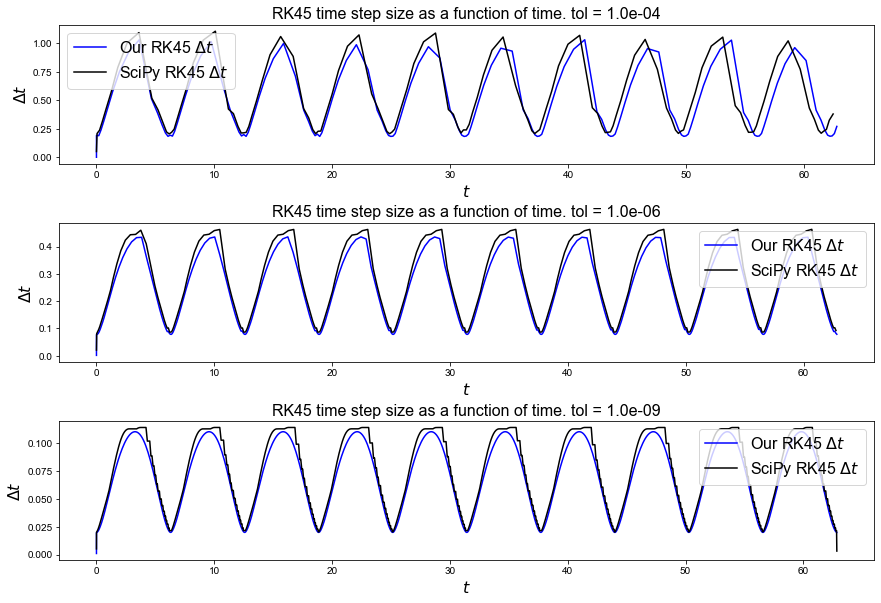

In [20]:
# check how the time step size varies with SciPy's RK45 implementation

ecc = 0.5

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi

# what do the time steps do?
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
fig.tight_layout(h_pad=4)
for i, tol in enumerate([1.e-4,1.e-6,1.e-9]):
    y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)
    y_solve_ivp_rk45 = solve_ivp(f_planetary, [t0, tf], y0, method='RK45', rtol=tol, atol=tol)

    ax[i].plot(t_rk45[:-1], np.diff(t_rk45), 'b', label='Our RK45 $\Delta t$')
    ax[i].plot(y_solve_ivp_rk45.t[:-1], np.diff(y_solve_ivp_rk45.t), 'k', label='SciPy RK45 $\Delta t$')
    ax[i].set_xlabel('$t$', fontsize=16)
    ax[i].set_ylabel('$\Delta t$', fontsize=16)
    ax[i].set_title('RK45 time step size as a function of time. tol = {:.1e}'.format(tol), fontsize=16)
    ax[i].legend(loc='best', fontsize=16)


Notice how with the lowest tolerance while the same trends and magnitudes of time step sizes are present, there is a phase shift between the two. This indicates that at this tolerance there is a reasonably significant difference in the two solutions. At the two lower tolerances, over the interval there is much closer agreement.

If we look at the agreement between the timings of the peaks and troughs between the lowest tolerance and the higher, then ours looks better. This would be consistent with the fact that at the lowest tolerance we seems to be using slightly lower time step sizes.

max/min dt for RK45 (after first orbit):  0.5792222442387427 0.0052540849775795095


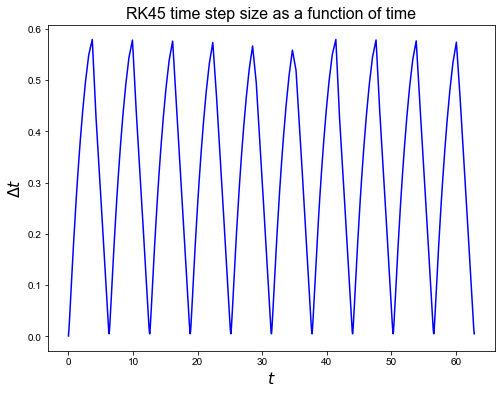

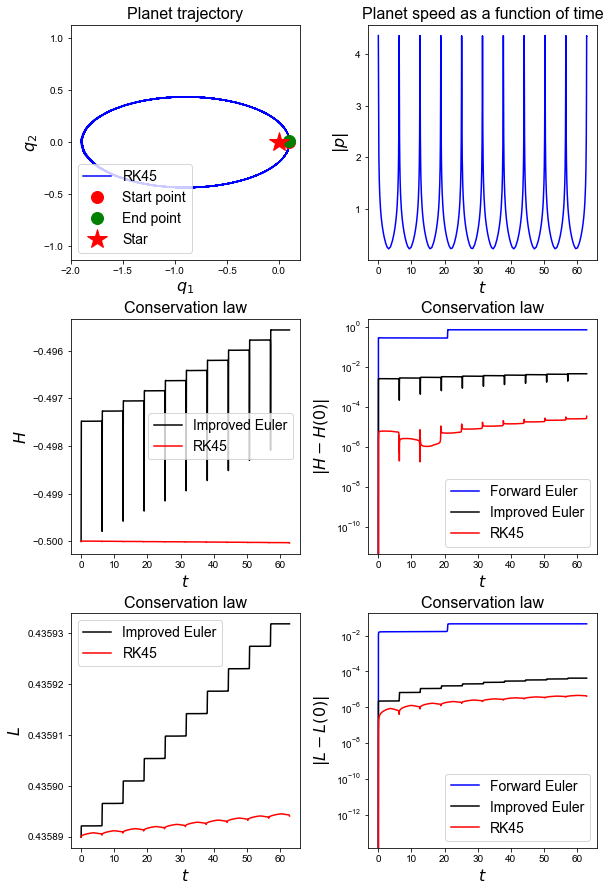

In [21]:
# what about a larger ecc (we know the FE orbit is not realistic)

ecc = 0.9

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi

tol = 1.e-6
y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)

print('max/min dt for RK45 (after first orbit): ', np.max(np.diff(t_rk45[t_rk45>2.*np.pi])), 
      np.min(np.diff(t_rk45[t_rk45>2.*np.pi])))

# what do the time steps do?
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.plot(t_rk45[:-1], np.diff(t_rk45), 'b')
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$\Delta t$', fontsize=16)
ax1.set_title('RK45 time step size as a function of time', fontsize=16)

# set up figure
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
fig.tight_layout(w_pad=4, h_pad=4)
ax = axs.reshape(-1)

ax[0].plot(y_rk45[:,0], y_rk45[:,1], 'b', label='RK45')
ax[0].plot(y_rk45[0,0], y_rk45[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y_rk45[-1,0], y_rk45[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(t_rk45, np.sqrt( y_rk45[:,2]**2 + y_rk45[:,3]**2) ,'b')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|p|$', fontsize=16)
ax[1].set_title('Planet speed as a function of time', fontsize=16)


H_rk45 = compute_Kepler_energy(y_rk45)
L_rk45 = compute_Kepler_angular_mom(y_rk45)

# recompute the FE and IE solutions with this ecc
y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
H_fe = compute_Kepler_energy(y_fe)
L_fe = compute_Kepler_angular_mom(y_fe)

y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
H_ie = compute_Kepler_energy(y_ie)
L_ie = compute_Kepler_angular_mom(y_ie)



#ax[2].plot(t_fe, H_fe, 'b', label='Forward Euler')
ax[2].plot(t_ie, H_ie, 'k', label='Improved Euler')
ax[2].plot(t_rk45, H_rk45, 'r', label='RK45')
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$H$', fontsize=16)
ax[2].set_title('Conservation law', fontsize=16)
ax[2].legend(loc='best', fontsize=14)

ax[3].semilogy(t_fe, np.abs(H_fe - H_fe[0]), 'b', label='Forward Euler')
ax[3].semilogy(t_ie, np.abs(H_ie - H_ie[0]), 'k', label='Improved Euler')
ax[3].semilogy(t_rk45, np.abs(H_rk45 - H_rk45[0]), 'r', label='RK45')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|H - H(0)|$', fontsize=16)
ax[3].set_title('Conservation law', fontsize=16)
ax[3].legend(loc='best', fontsize=14)

#ax[4].plot(t_fe, L_fe, 'b', label='Forward Euler')
ax[4].plot(t_ie, L_ie, 'k', label='Improved Euler')
ax[4].plot(t_rk45, L_rk45, 'r', label='RK45')
ax[4].set_xlabel('$t$', fontsize=16)
ax[4].set_ylabel('$L$', fontsize=16)
ax[4].set_title('Conservation law', fontsize=16)
ax[4].legend(loc='best', fontsize=14)


ax[5].semilogy(t_fe, np.abs(L_fe - L_fe[0]), 'b', label='Forward Euler')
ax[5].semilogy(t_ie, np.abs(L_ie - L_ie[0]), 'k', label='Improved Euler')
ax[5].semilogy(t_rk45, np.abs(L_rk45 - L_rk45[0]), 'r', label='RK45')
ax[5].set_xlabel('$t$', fontsize=16)
ax[5].set_ylabel('$|L - L(0)|$', fontsize=16)
ax[5].set_title('Conservation law', fontsize=16)
ax[5].legend(loc='best', fontsize=14)

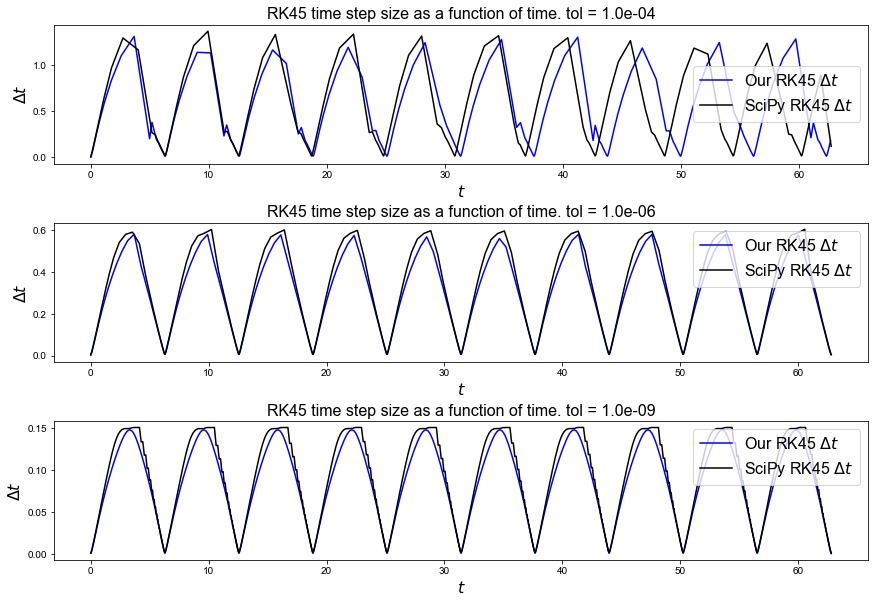

In [22]:
# Check agreement on time step sizes again for this higher ecc

# check how the time step size varies with SciPy's RK45 implementation

ecc = 0.9

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi

# what do the time steps do?
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
fig.tight_layout(h_pad=4)
for i, tol in enumerate([1.e-4,1.e-6,1.e-9]):
    y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)
    y_solve_ivp_rk45 = solve_ivp(f_planetary, [t0, tf], y0, method='RK45', rtol=tol, atol=tol)

    ax[i].plot(t_rk45[:-1], np.diff(t_rk45), 'b', label='Our RK45 $\Delta t$')
    ax[i].plot(y_solve_ivp_rk45.t[:-1], np.diff(y_solve_ivp_rk45.t), 'k', label='SciPy RK45 $\Delta t$')
    ax[i].set_xlabel('$t$', fontsize=16)
    ax[i].set_ylabel('$\Delta t$', fontsize=16)
    ax[i].set_title('RK45 time step size as a function of time. tol = {:.1e}'.format(tol), fontsize=16)
    ax[i].legend(loc='best', fontsize=16)


This shows a similar story to the lower eccentricity case!

<div class="advanced">

## Homework - Structure preservation (geometric integrators applied to the Kepler problem) [$\star\star$]

Implement the symplectic Euler method and compare this to our other three methods we have applied to the Kepler problem.

For details of the method see <https://en.wikipedia.org/wiki/Semi-implicit_Euler_method>.

As the name implies this is an example of a [*symplectic*](https://en.wikipedia.org/wiki/Symplectic_integrator) time stepping method. We don't have time to go into what this means, we simply state that methods such as this (a class of [*geometric integrator*](https://en.wikipedia.org/wiki/Geometric_integrator)) well suited to problems where it is important to try and preserve conservation laws (as well as related "geometric" structures. 

</div>

### Solution - Structure preservation  (geometric integrators applied to the Kepler problem)

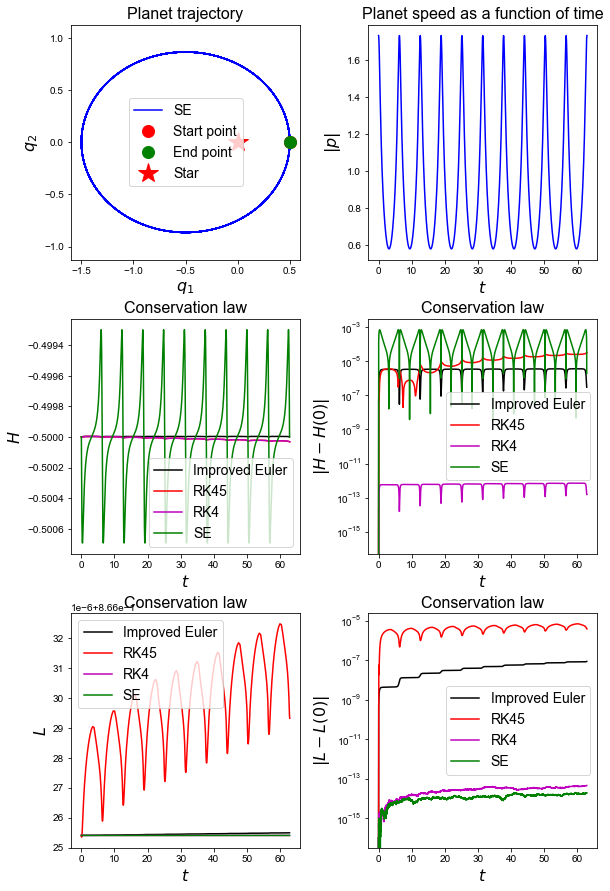

In [23]:
# split the function to facilitate our symplectic Euler implementation

def f_planetary_q(t, y):
    """ RHS function for orbital motion example.
    Note that here we just pass in p: y = (p_1,p_1)
    The q's are the position coordinates
    and the p's are the velocity components.
    """
    f = np.zeros_like(y)
    r = np.sqrt(y[0]**2 + y[1]**2)
    f[0] = y[0]
    f[1] = y[1]
    return f

def f_planetary_p(t, y):
    """ RHS function for orbital motion example.
    Note that here we just pass in q: y = (q_1,q_2)
    The q's are the position coordinates
    and the p's are the velocity components.
    """
    f = np.zeros_like(y)
    r = np.sqrt(y[0]**2 + y[1]**2)
    f[0] = -y[0] / r**3 
    f[1] = -y[1] / r**3  
    return f


def symplectic_euler(fq, fp, q0, p0, t0, t_max, dt):
    p = np.array(p0)
    q = np.array(q0)
    t = np.array(t0)
    q_all = [q0]
    p_all = [p0]
    t_all = [t0]
    while t < t_max:
        q = q + dt * fq(t, p) 
        p = p + dt * fp(t, q)         
        q_all.append(q)
        p_all.append(p)
        t = t + dt
        t_all.append(t)
    return np.array(q_all), np.array(p_all), np.array(t_all)

ecc = 0.5

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])
q0 = np.array([1. - ecc, 0.])
p0 = np.array([0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi


q_se, p_se, t_se = symplectic_euler(f_planetary_q, f_planetary_p, q0, p0, t0, tf, dt)
# to allow us to reuse our previous code direct let's stack these into a y variable
y_se = np.hstack((q_se,p_se))
H_se = compute_Kepler_energy(y_se)
L_se = compute_Kepler_angular_mom(y_se)


# recompute the RK45, FE and IE solutions with this ecc
tol = 1.e-6
y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)
H_rk45 = compute_Kepler_energy(y_rk45)
L_rk45 = compute_Kepler_angular_mom(y_rk45)


# we know FE is bad so don't bother with it
#y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
#H_fe = compute_Kepler_energy(y_fe)
#L_fe = compute_Kepler_angular_mom(y_fe)

y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
H_ie = compute_Kepler_energy(y_ie)
L_ie = compute_Kepler_angular_mom(y_ie)

# also try RK4 (as its a fixed dt)
y_rk4, t_rk4 = RK4(f_planetary, y0, t0, tf, dt)
H_rk4 = compute_Kepler_energy(y_rk4)
L_rk4 = compute_Kepler_angular_mom(y_rk4)


# set up figure
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
fig.tight_layout(w_pad=4, h_pad=4)
ax = axs.reshape(-1)

ax[0].plot(y_se[:,0], y_se[:,1], 'b', label='SE')
ax[0].plot(y_se[0,0], y_se[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y_se[-1,0], y_se[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(t_se, np.sqrt( y_se[:,2]**2 + y_se[:,3]**2) ,'b')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|p|$', fontsize=16)
ax[1].set_title('Planet speed as a function of time', fontsize=16)

#ax[2].plot(t_fe, H_fe, 'b', label='Forward Euler')
ax[2].plot(t_ie, H_ie, 'k', label='Improved Euler')
ax[2].plot(t_rk45, H_rk45, 'r', label='RK45')
ax[2].plot(t_rk45, H_rk45, 'm', label='RK4')
ax[2].plot(t_se, H_se, 'g', label='SE')
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$H$', fontsize=16)
ax[2].set_title('Conservation law', fontsize=16)
ax[2].legend(loc='best', fontsize=14)

#ax[3].semilogy(t_fe, np.abs(H_fe - H_fe[0]), 'b', label='Forward Euler')
ax[3].semilogy(t_ie, np.abs(H_ie - H_ie[0]), 'k', label='Improved Euler')
ax[3].semilogy(t_rk45, np.abs(H_rk45 - H_rk45[0]), 'r', label='RK45')
ax[3].semilogy(t_rk4, np.abs(H_rk4 - H_rk4[0]), 'm', label='RK4')
ax[3].semilogy(t_se, np.abs(H_se - H_se[0]), 'g', label='SE')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|H - H(0)|$', fontsize=16)
ax[3].set_title('Conservation law', fontsize=16)
ax[3].legend(loc='best', fontsize=14)

#ax[4].plot(t_fe, L_fe, 'b', label='Forward Euler')
ax[4].plot(t_ie, L_ie, 'k', label='Improved Euler')
ax[4].plot(t_rk45, L_rk45, 'r', label='RK45')
ax[4].plot(t_rk4, L_rk4, 'm', label='RK4')
ax[4].plot(t_se, L_se, 'g', label='SE')
ax[4].set_xlabel('$t$', fontsize=16)
ax[4].set_ylabel('$L$', fontsize=16)
ax[4].set_title('Conservation law', fontsize=16)
ax[4].legend(loc='best', fontsize=14)

#ax[5].semilogy(t_fe, np.abs(L_fe - L_fe[0]), 'b', label='Forward Euler')
ax[5].semilogy(t_ie, np.abs(L_ie - L_ie[0]), 'k', label='Improved Euler')
ax[5].semilogy(t_rk45, np.abs(L_rk45 - L_rk45[0]), 'r', label='RK45')
ax[5].semilogy(t_rk4, np.abs(L_rk4 - L_rk4[0]), 'm', label='RK4')
ax[5].semilogy(t_se, np.abs(L_se - L_se[0]), 'g', label='SE')
ax[5].set_xlabel('$t$', fontsize=16)
ax[5].set_ylabel('$|L - L(0)|$', fontsize=16)
ax[5].set_title('Conservation law', fontsize=16)
ax[5].legend(loc='best', fontsize=14)

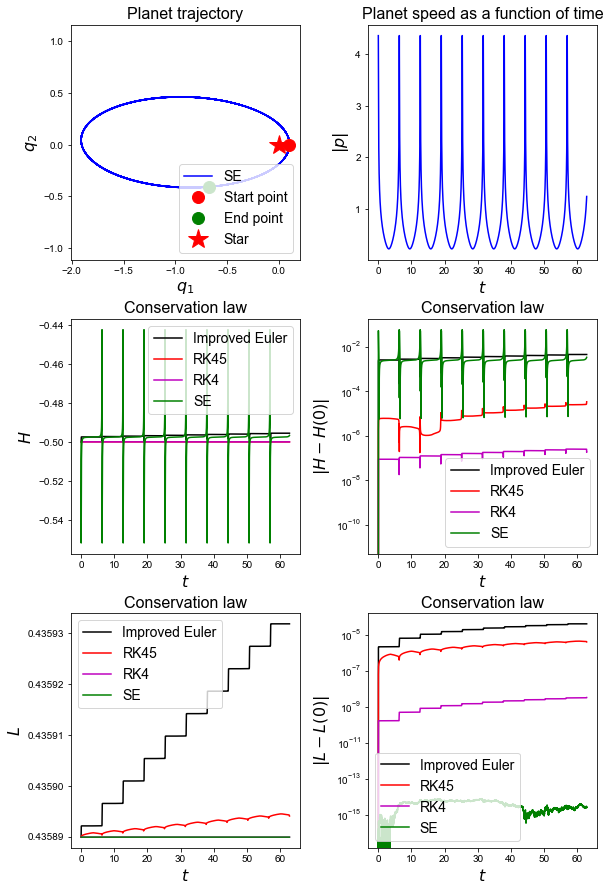

In [24]:
ecc = 0.9

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])
q0 = np.array([1. - ecc, 0.])
p0 = np.array([0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 10. * 2. * np.pi


q_se, p_se, t_se = symplectic_euler(f_planetary_q, f_planetary_p, q0, p0, t0, tf, dt)
# to allow us to reuse our previous code direct let's stack these into a y variable
y_se = np.hstack((q_se,p_se))
H_se = compute_Kepler_energy(y_se)
L_se = compute_Kepler_angular_mom(y_se)


# recompute the RK45, FE and IE solutions with this ecc
tol = 1.e-6
y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)
H_rk45 = compute_Kepler_energy(y_rk45)
L_rk45 = compute_Kepler_angular_mom(y_rk45)

# don't even bother with FE
#y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
#H_fe = compute_Kepler_energy(y_fe)
#L_fe = compute_Kepler_angular_mom(y_fe)

y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
H_ie = compute_Kepler_energy(y_ie)
L_ie = compute_Kepler_angular_mom(y_ie)

# also try RK4 (as its a fixed dt)
y_rk4, t_rk4 = RK4(f_planetary, y0, t0, tf, dt)
H_rk4 = compute_Kepler_energy(y_rk4)
L_rk4 = compute_Kepler_angular_mom(y_rk4)


# set up figure
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
fig.tight_layout(w_pad=4, h_pad=4)
ax = axs.reshape(-1)

ax[0].plot(y_se[:,0], y_se[:,1], 'b', label='SE')
ax[0].plot(y_se[0,0], y_se[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y_se[-1,0], y_se[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(t_se, np.sqrt( y_se[:,2]**2 + y_se[:,3]**2) ,'b')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|p|$', fontsize=16)
ax[1].set_title('Planet speed as a function of time', fontsize=16)

#ax[2].plot(t_fe, H_fe, 'b', label='Forward Euler')
ax[2].plot(t_ie, H_ie, 'k', label='Improved Euler')
ax[2].plot(t_rk45, H_rk45, 'r', label='RK45')
ax[2].plot(t_rk4, H_rk4, 'm', label='RK4')
ax[2].plot(t_se, H_se, 'g', label='SE')
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$H$', fontsize=16)
ax[2].set_title('Conservation law', fontsize=16)
ax[2].legend(loc='best', fontsize=14)

#ax[3].semilogy(t_fe, np.abs(H_fe - H_fe[0]), 'b', label='Forward Euler')
ax[3].semilogy(t_ie, np.abs(H_ie - H_ie[0]), 'k', label='Improved Euler')
ax[3].semilogy(t_rk45, np.abs(H_rk45 - H_rk45[0]), 'r', label='RK45')
ax[3].semilogy(t_rk4, np.abs(H_rk4 - H_rk4[0]), 'm', label='RK4')
ax[3].semilogy(t_se, np.abs(H_se - H_se[0]), 'g', label='SE')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|H - H(0)|$', fontsize=16)
ax[3].set_title('Conservation law', fontsize=16)
ax[3].legend(loc='best', fontsize=14)

#ax[4].plot(t_fe, L_fe, 'b', label='Forward Euler')
ax[4].plot(t_ie, L_ie, 'k', label='Improved Euler')
ax[4].plot(t_rk45, L_rk45, 'r', label='RK45')
ax[4].plot(t_rk4, L_rk4, 'm', label='RK4')
ax[4].plot(t_se, L_se, 'g', label='SE')
ax[4].set_xlabel('$t$', fontsize=16)
ax[4].set_ylabel('$L$', fontsize=16)
ax[4].set_title('Conservation law', fontsize=16)
ax[4].legend(loc='best', fontsize=14)


#ax[5].semilogy(t_fe, np.abs(L_fe - L_fe[0]), 'b', label='Forward Euler')
ax[5].semilogy(t_ie, np.abs(L_ie - L_ie[0]), 'k', label='Improved Euler')
ax[5].semilogy(t_rk45, np.abs(L_rk45 - L_rk45[0]), 'r', label='RK45')
ax[5].semilogy(t_rk4, np.abs(L_rk4 - L_rk4[0]), 'm', label='RK4')
ax[5].semilogy(t_se, np.abs(L_se - L_se[0]), 'g', label='SE')
ax[5].set_xlabel('$t$', fontsize=16)
ax[5].set_ylabel('$|L - L(0)|$', fontsize=16)
ax[5].set_title('Conservation law', fontsize=16)
ax[5].legend(loc='best', fontsize=14)

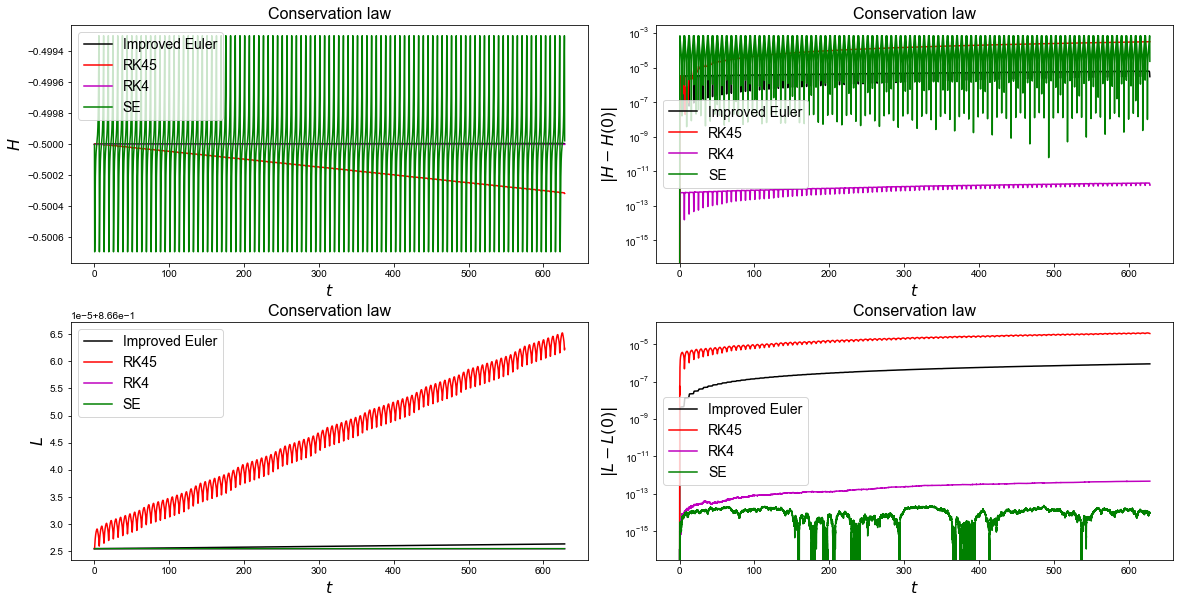

In [25]:
# run for longer

ecc = 0.5

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])
q0 = np.array([1. - ecc, 0.])
p0 = np.array([0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 100. * 2. * np.pi


#y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
#H_fe = compute_Kepler_energy(y_fe)
#L_fe = compute_Kepler_angular_mom(y_fe)

y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
H_ie = compute_Kepler_energy(y_ie)
L_ie = compute_Kepler_angular_mom(y_ie)

tol = 1.e-6
y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)
H_rk45 = compute_Kepler_energy(y_rk45)
L_rk45 = compute_Kepler_angular_mom(y_rk45)

q_se, p_se, t_se = symplectic_euler(f_planetary_q, f_planetary_p, q0, p0, t0, tf, dt)
y_se = np.hstack((q_se,p_se))
H_se = compute_Kepler_energy(y_se)
L_se = compute_Kepler_angular_mom(y_se)

# also try RK4 (as its a fixed dt)
y_rk4, t_rk4 = RK4(f_planetary, y0, t0, tf, dt)
H_rk4 = compute_Kepler_energy(y_rk4)
L_rk4 = compute_Kepler_angular_mom(y_rk4)


# set up figure
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout(w_pad=4, h_pad=4)
ax = axs.reshape(-1)

#ax[0].plot(t_fe, H_fe, 'b', label='Forward Euler')
ax[0].plot(t_ie, H_ie, 'k', label='Improved Euler')
ax[0].plot(t_rk45, H_rk45, 'r', label='RK45')
ax[0].plot(t_rk4, H_rk4, 'm', label='RK4')
ax[0].plot(t_se, H_se, 'g', label='SE')
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylabel('$H$', fontsize=16)
ax[0].set_title('Conservation law', fontsize=16)
ax[0].legend(loc='best', fontsize=14)

#ax[1].semilogy(t_fe, np.abs(H_fe - H_fe[0]), 'b', label='Forward Euler')
ax[1].semilogy(t_ie, np.abs(H_ie - H_ie[0]), 'k', label='Improved Euler')
ax[1].semilogy(t_rk45, np.abs(H_rk45 - H_rk45[0]), 'r', label='RK45')
ax[1].semilogy(t_rk4, np.abs(H_rk4 - H_rk4[0]), 'm', label='RK4')
ax[1].semilogy(t_se, np.abs(H_se - H_se[0]), 'g', label='SE')
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$|H - H(0)|$', fontsize=16)
ax[1].set_title('Conservation law', fontsize=16)
ax[1].legend(loc='best', fontsize=14)

#ax[2].plot(t_fe, L_fe, 'b', label='Forward Euler')
ax[2].plot(t_ie, L_ie, 'k', label='Improved Euler')
ax[2].plot(t_rk45, L_rk45, 'r', label='RK45')
ax[2].plot(t_rk4, L_rk4, 'm', label='RK4')
ax[2].plot(t_se, L_se, 'g', label='SE')
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$L$', fontsize=16)
ax[2].set_title('Conservation law', fontsize=16)
ax[2].legend(loc='best', fontsize=14)

#ax[3].semilogy(t_fe, np.abs(L_fe - L_fe[0]), 'b', label='Forward Euler')
ax[3].semilogy(t_ie, np.abs(L_ie - L_ie[0]), 'k', label='Improved Euler')
ax[3].semilogy(t_rk45, np.abs(L_rk45 - L_rk45[0]), 'r', label='RK45')
ax[3].semilogy(t_rk4, np.abs(L_rk4 - L_rk4[0]), 'm', label='RK4')
ax[3].semilogy(t_se, np.abs(L_se - L_se[0]), 'g', label='SE')
ax[3].set_xlabel('$t$', fontsize=16)
ax[3].set_ylabel('$|L - L(0)|$', fontsize=16)
ax[3].set_title('Conservation law', fontsize=16)
ax[3].legend(loc='best', fontsize=14)


(0.0, 0.1)

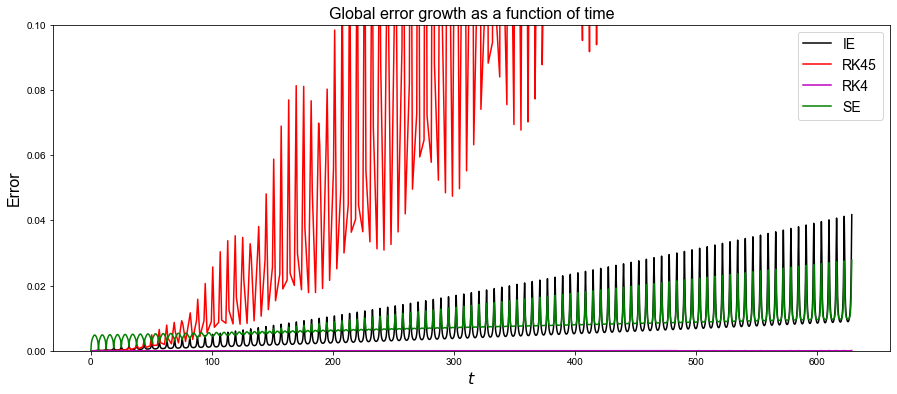

In [26]:
# Global errors

ecc = 0.5

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])
q0 = np.array([1. - ecc, 0.])
p0 = np.array([0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 100. * 2. * np.pi

#y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
tol = 1.e-6
y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)
y_rk4, t_rk4 = RK4(f_planetary, y0, t0, tf, dt)
q_se, p_se, t_se = symplectic_euler(f_planetary_q, f_planetary_p, q0, p0, t0, tf, dt)
y_se = np.hstack((q_se,p_se))


#t_ivp = t_fe
#y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
#error_fe = np.linalg.norm( y_solve_ivp_rk45.y - y_fe.T, axis=0 )

t_ivp = t_ie
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_ie = np.linalg.norm( y_solve_ivp_rk45.y - y_ie.T, axis=0 )

t_ivp = t_rk45
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_rk45 = np.linalg.norm( y_solve_ivp_rk45.y - y_rk45.T, axis=0 )

t_ivp = t_rk4
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_rk4 = np.linalg.norm( y_solve_ivp_rk45.y - y_rk4.T, axis=0 )

t_ivp = t_se
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_se = np.linalg.norm( y_solve_ivp_rk45.y - y_se.T, axis=0 )


fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))
#ax1.plot(t_fe[::10], error_fe[::10], 'b', label='FE')
ax1.plot(t_ie[::10], error_ie[::10], 'k', label='IE')
ax1.plot(t_rk45[::10], error_rk45[::10], 'r', label='RK45')
ax1.plot(t_rk4[::10], error_rk4[::10], 'm', label='RK4')
ax1.plot(t_se[::10], error_se[::10], 'g', label='SE')
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Global error growth as a function of time', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.set_ylim(0,0.1)

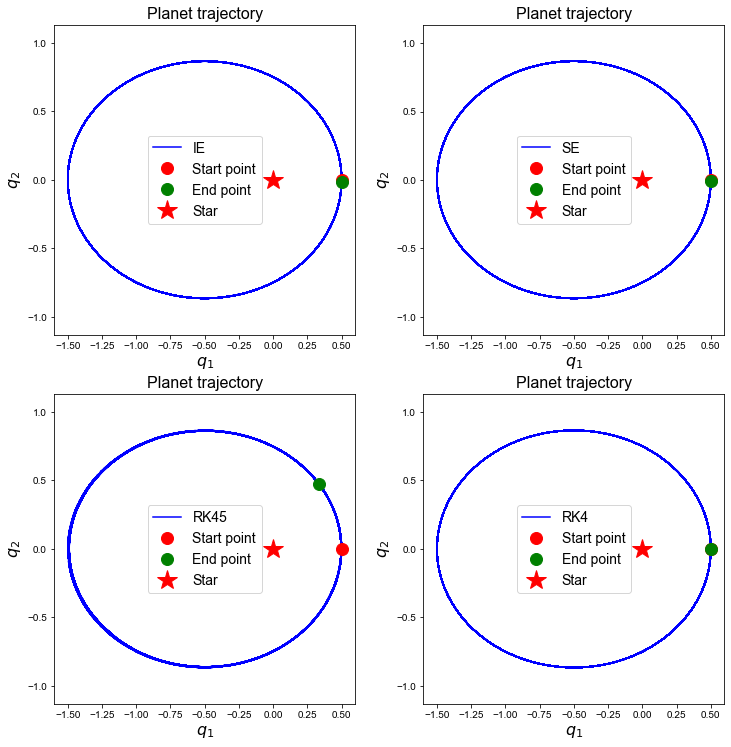

In [27]:

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

ax[0].plot(y_ie[:,0], y_ie[:,1], 'b', label='IE')
ax[0].plot(y_ie[0,0], y_ie[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y_ie[-1,0], y_ie[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(y_se[:,0], y_se[:,1], 'b', label='SE')
ax[1].plot(y_se[0,0], y_se[0,1], 'ro', label='Start point', markersize=12)
ax[1].plot(y_se[-1,0], y_se[-1,1], 'go', label='End point', markersize=12)
ax[1].plot(0,0,'r*',label = 'Star', markersize=20)
ax[1].set_xlabel('$q_1$', fontsize=16)
ax[1].set_ylabel('$q_2$', fontsize=16)
ax[1].set_title('Planet trajectory', fontsize=16)
ax[1].axis('equal')
ax[1].legend(loc='best', fontsize=14)

ax[2].plot(y_rk45[:,0], y_rk45[:,1], 'b', label='RK45')
ax[2].plot(y_rk45[0,0], y_rk45[0,1], 'ro', label='Start point', markersize=12)
ax[2].plot(y_rk45[-1,0], y_rk45[-1,1], 'go', label='End point', markersize=12)
ax[2].plot(0,0,'r*',label = 'Star', markersize=20)
ax[2].set_xlabel('$q_1$', fontsize=16)
ax[2].set_ylabel('$q_2$', fontsize=16)
ax[2].set_title('Planet trajectory', fontsize=16)
ax[2].axis('equal')
ax[2].legend(loc='best', fontsize=14)

ax[3].plot(y_rk4[:,0], y_rk4[:,1], 'b', label='RK4')
ax[3].plot(y_rk4[0,0], y_rk4[0,1], 'ro', label='Start point', markersize=12)
ax[3].plot(y_rk4[-1,0], y_rk4[-1,1], 'go', label='End point', markersize=12)
ax[3].plot(0,0,'r*',label = 'Star', markersize=20)
ax[3].set_xlabel('$q_1$', fontsize=16)
ax[3].set_ylabel('$q_2$', fontsize=16)
ax[3].set_title('Planet trajectory', fontsize=16)
ax[3].axis('equal')
ax[3].legend(loc='best', fontsize=14)

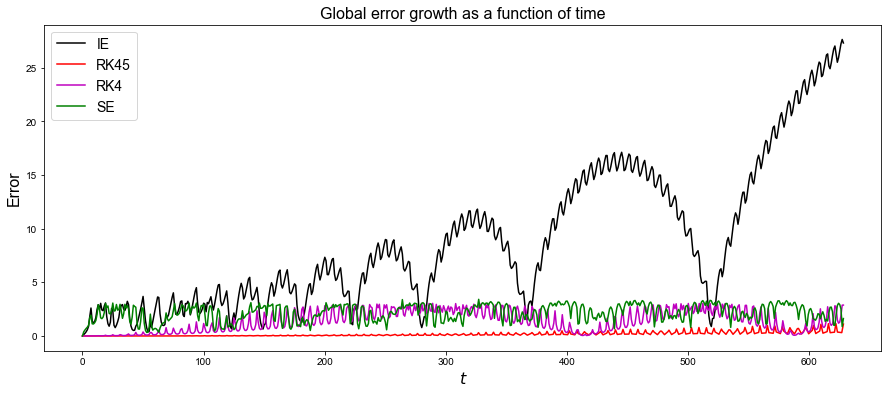

In [28]:
# Global errors - check higher dt

ecc = 0.5

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])
q0 = np.array([1. - ecc, 0.])
p0 = np.array([0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.1
t0 = 0.0
# period should be 2 pi
tf = 100. * 2. * np.pi

#y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
tol = 1.e-6
y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)
y_rk4, t_rk4 = RK4(f_planetary, y0, t0, tf, dt)
q_se, p_se, t_se = symplectic_euler(f_planetary_q, f_planetary_p, q0, p0, t0, tf, dt)
y_se = np.hstack((q_se,p_se))


#t_ivp = t_fe
#y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
#error_fe = np.linalg.norm( y_solve_ivp_rk45.y - y_fe.T, axis=0 )

t_ivp = t_ie
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_ie = np.linalg.norm( y_solve_ivp_rk45.y - y_ie.T, axis=0 )

t_ivp = t_rk45
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_rk45 = np.linalg.norm( y_solve_ivp_rk45.y - y_rk45.T, axis=0 )

t_ivp = t_rk4
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_rk4 = np.linalg.norm( y_solve_ivp_rk45.y - y_rk4.T, axis=0 )

t_ivp = t_se
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_se = np.linalg.norm( y_solve_ivp_rk45.y - y_se.T, axis=0 )


fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))
#ax1.plot(t_fe[::10], error_fe[::10], 'b', label='FE')
ax1.plot(t_ie[::10], error_ie[::10], 'k', label='IE')
ax1.plot(t_rk45[::10], error_rk45[::10], 'r', label='RK45')
ax1.plot(t_rk4[::10], error_rk4[::10], 'm', label='RK4')
ax1.plot(t_se[::10], error_se[::10], 'g', label='SE')
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Global error growth as a function of time', fontsize=16)
ax1.legend(loc='best', fontsize=14)
#ax1.set_ylim(0,0.1)


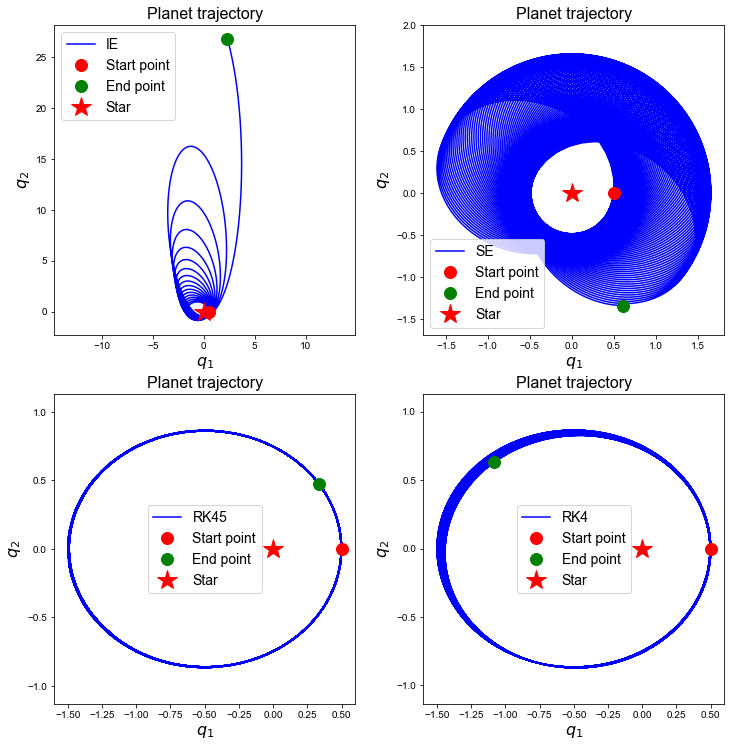

In [29]:

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

ax[0].plot(y_ie[:,0], y_ie[:,1], 'b', label='IE')
ax[0].plot(y_ie[0,0], y_ie[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y_ie[-1,0], y_ie[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(y_se[:,0], y_se[:,1], 'b', label='SE')
ax[1].plot(y_se[0,0], y_se[0,1], 'ro', label='Start point', markersize=12)
ax[1].plot(y_se[-1,0], y_se[-1,1], 'go', label='End point', markersize=12)
ax[1].plot(0,0,'r*',label = 'Star', markersize=20)
ax[1].set_xlabel('$q_1$', fontsize=16)
ax[1].set_ylabel('$q_2$', fontsize=16)
ax[1].set_title('Planet trajectory', fontsize=16)
ax[1].axis('equal')
ax[1].legend(loc='best', fontsize=14)

ax[2].plot(y_rk45[:,0], y_rk45[:,1], 'b', label='RK45')
ax[2].plot(y_rk45[0,0], y_rk45[0,1], 'ro', label='Start point', markersize=12)
ax[2].plot(y_rk45[-1,0], y_rk45[-1,1], 'go', label='End point', markersize=12)
ax[2].plot(0,0,'r*',label = 'Star', markersize=20)
ax[2].set_xlabel('$q_1$', fontsize=16)
ax[2].set_ylabel('$q_2$', fontsize=16)
ax[2].set_title('Planet trajectory', fontsize=16)
ax[2].axis('equal')
ax[2].legend(loc='best', fontsize=14)

ax[3].plot(y_rk4[:,0], y_rk4[:,1], 'b', label='RK4')
ax[3].plot(y_rk4[0,0], y_rk4[0,1], 'ro', label='Start point', markersize=12)
ax[3].plot(y_rk4[-1,0], y_rk4[-1,1], 'go', label='End point', markersize=12)
ax[3].plot(0,0,'r*',label = 'Star', markersize=20)
ax[3].set_xlabel('$q_1$', fontsize=16)
ax[3].set_ylabel('$q_2$', fontsize=16)
ax[3].set_title('Planet trajectory', fontsize=16)
ax[3].axis('equal')
ax[3].legend(loc='best', fontsize=14)

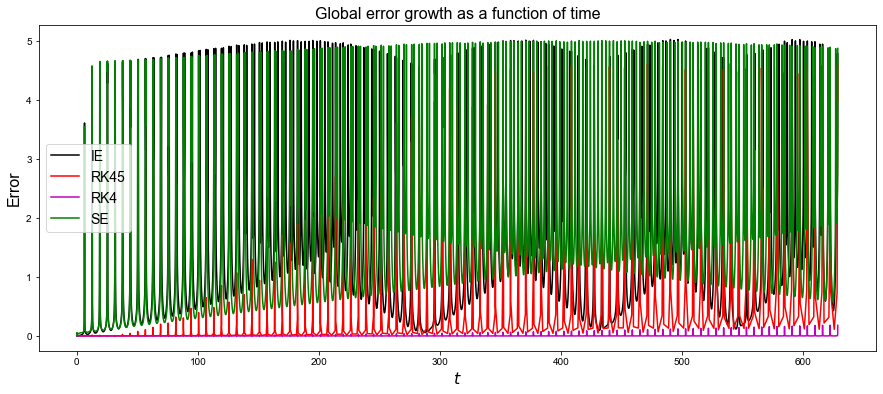

In [30]:
# Global errors- check the higher ecc case

ecc = 0.9

# Initial conditions
y0 = np.array([1. - ecc, 0., 0., np.sqrt( (1.+ecc) / (1.-ecc))])
q0 = np.array([1. - ecc, 0.])
p0 = np.array([0., np.sqrt( (1.+ecc) / (1.-ecc))])

# problem parameters
dt = 0.001
t0 = 0.0
# period should be 2 pi
tf = 100. * 2. * np.pi

#y_fe, t_fe = forward_euler(f_planetary, y0, t0, tf, dt)
y_ie, t_ie = improved_euler(f_planetary, y0, t0, tf, dt)
tol = 1.e-6
y_rk45, t_rk45 = RK45(f_planetary, y0, t0, tf, dt, tol)
y_rk4, t_rk4 = RK4(f_planetary, y0, t0, tf, dt)
q_se, p_se, t_se = symplectic_euler(f_planetary_q, f_planetary_p, q0, p0, t0, tf, dt)
y_se = np.hstack((q_se,p_se))


#t_ivp = t_fe
#y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
#error_fe = np.linalg.norm( y_solve_ivp_rk45.y - y_fe.T, axis=0 )

t_ivp = t_ie
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_ie = np.linalg.norm( y_solve_ivp_rk45.y - y_ie.T, axis=0 )

t_ivp = t_rk45
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_rk45 = np.linalg.norm( y_solve_ivp_rk45.y - y_rk45.T, axis=0 )

t_ivp = t_rk4
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_rk4 = np.linalg.norm( y_solve_ivp_rk45.y - y_rk4.T, axis=0 )

t_ivp = t_se
y_solve_ivp_rk45 = solve_ivp(f_planetary, [t_ivp[0], t_ivp[-1]], y0, method='RK45', t_eval=t_ivp, rtol=1.e-10, atol=1.0e-10)
error_se = np.linalg.norm( y_solve_ivp_rk45.y - y_se.T, axis=0 )


fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))
#ax1.plot(t_fe[::10], error_fe[::10], 'b', label='FE')
ax1.plot(t_ie[::10], error_ie[::10], 'k', label='IE')
ax1.plot(t_rk45[::10], error_rk45[::10], 'r', label='RK45')
ax1.plot(t_rk4[::10], error_rk4[::10], 'm', label='RK4')
ax1.plot(t_se[::10], error_se[::10], 'g', label='SE')
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Global error growth as a function of time', fontsize=16)
ax1.legend(loc='best', fontsize=14)
#ax1.set_ylim(0,0.1)

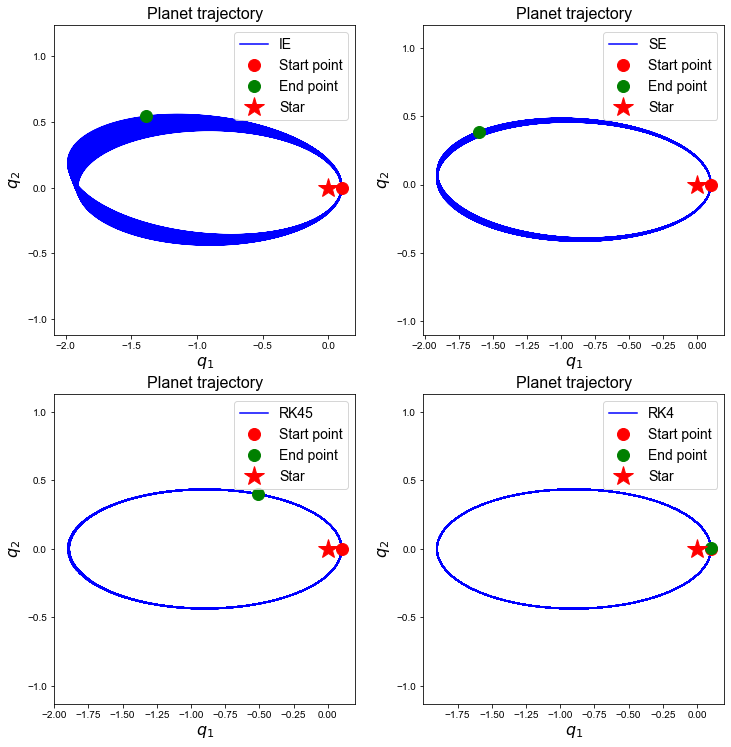

In [31]:

# set up figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(w_pad=4, h_pad=4)
# reshape the list of axes as we are going to use in a loop
ax = axs.reshape(-1)

ax[0].plot(y_ie[:,0], y_ie[:,1], 'b', label='IE')
ax[0].plot(y_ie[0,0], y_ie[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y_ie[-1,0], y_ie[-1,1], 'go', label='End point', markersize=12)
ax[0].plot(0,0,'r*',label = 'Star', markersize=20)
ax[0].set_xlabel('$q_1$', fontsize=16)
ax[0].set_ylabel('$q_2$', fontsize=16)
ax[0].set_title('Planet trajectory', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)

ax[1].plot(y_se[:,0], y_se[:,1], 'b', label='SE')
ax[1].plot(y_se[0,0], y_se[0,1], 'ro', label='Start point', markersize=12)
ax[1].plot(y_se[-1,0], y_se[-1,1], 'go', label='End point', markersize=12)
ax[1].plot(0,0,'r*',label = 'Star', markersize=20)
ax[1].set_xlabel('$q_1$', fontsize=16)
ax[1].set_ylabel('$q_2$', fontsize=16)
ax[1].set_title('Planet trajectory', fontsize=16)
ax[1].axis('equal')
ax[1].legend(loc='best', fontsize=14)

ax[2].plot(y_rk45[:,0], y_rk45[:,1], 'b', label='RK45')
ax[2].plot(y_rk45[0,0], y_rk45[0,1], 'ro', label='Start point', markersize=12)
ax[2].plot(y_rk45[-1,0], y_rk45[-1,1], 'go', label='End point', markersize=12)
ax[2].plot(0,0,'r*',label = 'Star', markersize=20)
ax[2].set_xlabel('$q_1$', fontsize=16)
ax[2].set_ylabel('$q_2$', fontsize=16)
ax[2].set_title('Planet trajectory', fontsize=16)
ax[2].axis('equal')
ax[2].legend(loc='best', fontsize=14)

ax[3].plot(y_rk4[:,0], y_rk4[:,1], 'b', label='RK4')
ax[3].plot(y_rk4[0,0], y_rk4[0,1], 'ro', label='Start point', markersize=12)
ax[3].plot(y_rk4[-1,0], y_rk4[-1,1], 'go', label='End point', markersize=12)
ax[3].plot(0,0,'r*',label = 'Star', markersize=20)
ax[3].set_xlabel('$q_1$', fontsize=16)
ax[3].set_ylabel('$q_2$', fontsize=16)
ax[3].set_title('Planet trajectory', fontsize=16)
ax[3].axis('equal')
ax[3].legend(loc='best', fontsize=14)

<div class="advanced">

## Homework - ODE solver timings (non-stiff problems) [$\star\star$]

In an earlier homework question we compared a variety of SciPy's ODE solver methods on the problem

$$ y' = y - t^2 +1, \;\;\;\;\; y(0) = \frac{1}{2},$$

which has the exact solution

$$ y(t) = (t + 1)^2 - \frac{e^{t}}{2}. $$

We integrated from $t=0$ and evaluating the error at $t=4$.

We varied the rtol and atol error tolerance parameters to generate plots of the 'error' vs the 'user-specified error tolerance'.

This was interesting but of far more value would be an analysis of errors vs run times.

Extend the homework exercise by recording solution timings (e.g. look back at Lecture 3's use of `%timeit` to provide estimates of run times.)

What do you observe from these results, and the differences observed between the 'error' vs 'tolerance' and 'error' vs 'run time' plots?

Finally, see how our own implementations of improved Euler (IE), AM3, RK4 and RK45 (i.e. our Dormand & Prince adaptive time stepping solver) compare. What conclusions can you draw from this comparison? 

</div>

### Solution - ODE solver timings (non-stiff problems)

0
116 µs ± 5.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
635 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.55 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.17 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.96 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.2 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1
136 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.3 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.01 ms ± 466 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.08 ms ± 83.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
11.5 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.9 ms ± 682 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2
189 µs ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.71 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loo

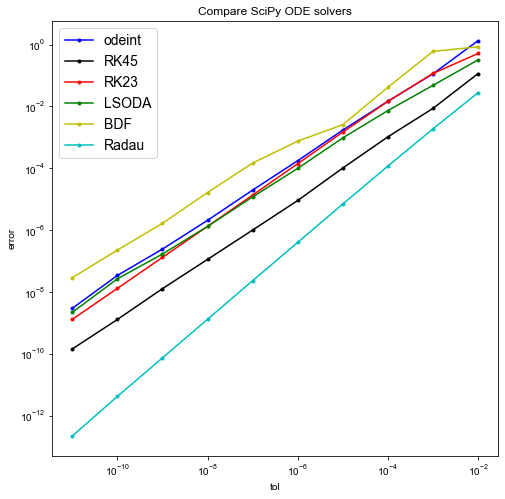

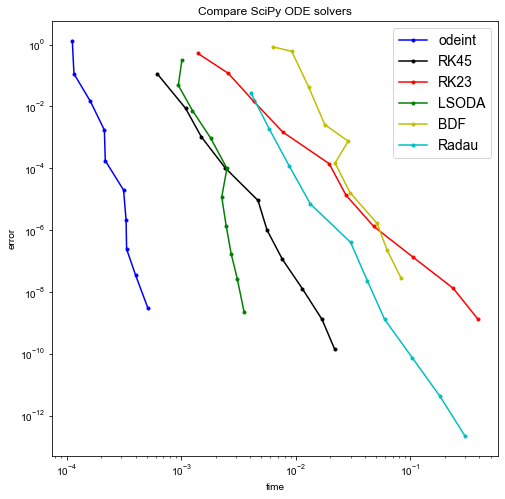

In [32]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def f(t, y):
    return y - t**2 + 1.

def y_ex(t):
    return (t+1)**2 - np.exp(t)/2.

# initial condition
y0 = 0.5

# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 4.0
ts = np.linspace(t0, tend, N)

tols = np.array([10.**(-p) for p in np.arange(2,12)])

errors_odeint = np.zeros((len(tols)), dtype=float)
errors_rk45 = np.zeros((len(tols)), dtype=float)
errors_rk23 = np.zeros((len(tols)), dtype=float)
errors_lsoda = np.zeros((len(tols)), dtype=float)
errors_bdf = np.zeros((len(tols)), dtype=float)
errors_radau = np.zeros((len(tols)), dtype=float)

for i, tol in enumerate(tols):
    r_tol = tol
    a_tol = tol
    y_odeint = odeint(f, y0, ts, rtol=r_tol, atol=a_tol, tfirst=True)
    errors_odeint[i] = np.abs(y_odeint[-1][0] - y_ex(ts[-1]))
    y_solve_ivp_rk45 = solve_ivp(f, [t0, tend], np.array([y0]), method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk45[i] = np.abs(y_solve_ivp_rk45.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_rk23 = solve_ivp(f, [t0, tend], np.array([y0]), method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk23[i] = np.abs(y_solve_ivp_rk23.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_lsoda = solve_ivp(f, [t0, tend], np.array([y0]), method='LSODA', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_lsoda[i] = np.abs(y_solve_ivp_lsoda.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_bdf = solve_ivp(f, [t0, tend], np.array([y0]), method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_bdf[i] = np.abs(y_solve_ivp_bdf.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_radau = solve_ivp(f, [t0, tend], np.array([y0]), method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_radau[i] = np.abs(y_solve_ivp_radau.y[0][-1] - y_ex(ts[-1]))

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.loglog(tols, errors_odeint, 'b.-', label='odeint')
ax1.loglog(tols, errors_rk45, 'k.-', label='RK45')
ax1.loglog(tols, errors_rk23, 'r.-', label='RK23')
ax1.loglog(tols, errors_lsoda, 'g.-', label='LSODA')
ax1.loglog(tols, errors_bdf, 'y.-', label='BDF')
ax1.loglog(tols, errors_radau, 'c.-', label='Radau')
ax1.set_xlabel('tol')
ax1.set_ylabel('error')
ax1.set_title('Compare SciPy ODE solvers')
ax1.legend(loc='best', fontsize=14)

times_odeint = np.zeros((len(tols)), dtype=float)
times_rk45 = np.zeros((len(tols)), dtype=float)
times_rk23 = np.zeros((len(tols)), dtype=float)
times_lsoda = np.zeros((len(tols)), dtype=float)
times_bdf = np.zeros((len(tols)), dtype=float)
times_radau = np.zeros((len(tols)), dtype=float)

for i, tol in enumerate(tols):
    print(i)
    r_tol = tol
    a_tol = tol
    timer = %timeit -o y_odeint = odeint(f, y0, ts, rtol=r_tol, atol=a_tol, tfirst=True)
    times_odeint[i] = timer.best
    timer = %timeit -o y_solve_ivp_rk45 = solve_ivp(f, [t0, tend], np.array([y0]), method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_rk45[i] = timer.best
    timer = %timeit -o y_solve_ivp_rk23 = solve_ivp(f, [t0, tend], np.array([y0]), method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_rk23[i] = timer.best
    timer = %timeit -o y_solve_ivp_lsoda = solve_ivp(f, [t0, tend], np.array([y0]), method='LSODA', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_lsoda[i] = timer.best
    timer = %timeit -o y_solve_ivp_bdf = solve_ivp(f, [t0, tend], np.array([y0]), method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_bdf[i] = timer.best
    timer = %timeit -o y_solve_ivp_radau = solve_ivp(f, [t0, tend], np.array([y0]), method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_radau[i] = timer.best

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.loglog(times_odeint, errors_odeint, 'b.-', label='odeint')
ax1.loglog(times_rk45, errors_rk45, 'k.-', label='RK45')
ax1.loglog(times_rk23, errors_rk23, 'r.-', label='RK23')
ax1.loglog(times_lsoda, errors_lsoda, 'g.-', label='LSODA')
ax1.loglog(times_bdf, errors_bdf, 'y.-', label='BDF')
ax1.loglog(times_radau, errors_radau, 'c.-', label='Radau')
ax1.set_xlabel('time')
ax1.set_ylabel('error')
ax1.set_title('Compare SciPy ODE solvers')
ax1.legend(loc='best', fontsize=14)

One observation here is that while the errors for `odeint` (which claims to use `lsoda`) are consistent with `solve_ivp` combined with the option `lsoda`, the timings are about an order of magnitude out. It appears that `solve_ivp` has an additional overhead.

For more on this see the discussion here: <https://github.com/scipy/scipy/issues/8257> and <https://stackoverflow.com/questions/55152516/differences-between-two-ode-solvers/>

Within the `solve_ivp` family, although the fifth order Radau method is accurate, and we may have concluded it was the best method/method of choice based upon the homework exercise alone, it is also expensive and so the plot of error vs run times would instead point us to the use of RK45 (if we ignore `odeint`), at least for lower tol values.

Next let's see how some of our own solver implementations compare.

In [33]:
def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


a21 = 1. / 5.

a31 = 3. / 40.
a32 = 9. / 40.

a41 = 44. / 45.
a42 = -56. / 15.
a43 = 32. / 9.

a51 =  19372. / 6561.
a52 = -25360. / 2187.
a53 = 64448. / 6561.
a54 = -212. / 729.

a61 = 9017. / 3168.
a62 = -355. / 33.
a63 = 46732. / 5247.0
a64 = 49. / 176.
a65 = -5103. / 18656.

a71 = 35. / 384.
a72 = 0.
a73 = 500. / 1113.
a74 = 125. / 192.
a75 = -2187. / 6784.
a76 = 11. / 84.

c2 = 1. / 5.
c3 = 3. / 10.
c4 = 4. / 5.
c5 = 8. / 9.
c6 = 1.
c7 = 1.

b1a = 35. / 384.
b2a = 0.
b3a = 500. / 1113.
b4a = 125. / 192.
b5a = -2187. / 6784.0
b6a = 11. / 84.0
b7a = 0.0

b1b = 5179. / 57600.0
b2b = 0.0
b3b = 7571. / 16695.0
b4b = 393. / 640.0
b5b = -92097. / 339200.
b6b = 187. / 2100.
b7b = 1. / 40.

def RK45(f, y0, t0, t_max, dt, tol):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]               
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + c2*dt, y + a21*k1)
        k3 = dt*f(t + c3*dt, y + a31*k1 + a32*k2)
        k4 = dt*f(t + c4*dt, y + a41*k1 + a42*k2 + a43*k3)
        k5 = dt*f(t + c5*dt, y + a51*k1 + a52*k2 + a53*k3 + a54*k4)
        k6 = dt*f(t + c6*dt, y + a61*k1 + a62*k2 + a63*k3 + a64*k4 + a65*k5)
        k7 = dt*f(t + c7*dt, y + a71*k1 + a72*k2 + a73*k3 + a74*k4 + a75*k5 + a76*k6)
        y5 = y + b1a*k1 + b2a*k2 + b3a*k3 + b4a*k4 + b5a*k5 + b6a*k6 +b7a*k7
        y4 = y + b1b*k1 + b2b*k2 + b3b*k3 + b4b*k4 + b5b*k5 + b6b*k6 +b7b*k7
        # error control
        e = np.linalg.norm(y5 - y4)/np.sqrt(y.size)
        dt_next = 0.9 * (tol/e)**(1./5.) * dt
        if e < tol:
            y = y5
            y_all.append(y)
            t = t + dt
            t_all.append(t) 
        dt = dt_next
    return np.array(y_all), np.array(t_all)

114 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
221 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
192 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
313 µs ± 26.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
459 µs ± 157 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
536 µs ± 29.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
675 µs ± 88.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.19 ms ± 240 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.22 ms ± 85.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.98 ms ± 54.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.22 ms ± 38.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.76 ms ± 92.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.4 ms ± 49.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.53 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loop

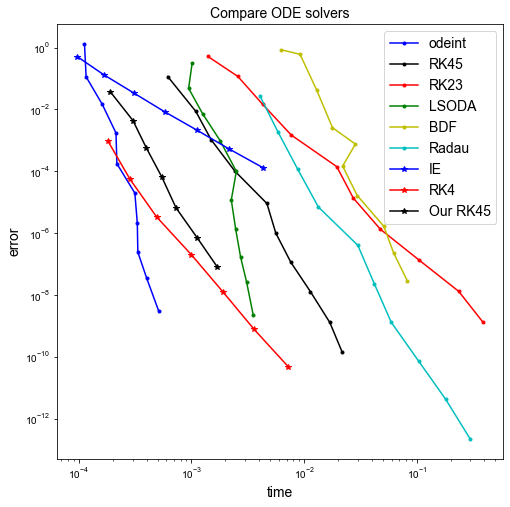

In [34]:
# Now add in some of our own results

# this assumes we can re-use the data from the previous cells and avoid the need to run the SciPy options again

# as many of our methods are fixed time step (not our RK45 implementation), we also need to iterate over
# different time step sizes rather than error tolerances.

# initial condition
y0 = 0.5

# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 4.0
ts = np.linspace(t0, tend, N)

dts = np.array([0.5**(p) for p in np.arange(2,9)])

errors_ie = np.zeros((len(dts)), dtype=float)
errors_rk4 = np.zeros((len(dts)), dtype=float)
errors_am3 = np.zeros((len(dts)), dtype=float)
times_ie = np.zeros((len(dts)), dtype=float)
times_rk4 = np.zeros((len(dts)), dtype=float)
times_am3 = np.zeros((len(dts)), dtype=float)

for i, dt in enumerate(dts):
    y_ie, t_ie = improved_euler(f, y0, t0, tend, dt)
    errors_ie[i] = np.abs(y_ie[-1] - y_ex(t_ie[-1]))
    y_rk4, t_rk4 = RK4(f, y0, t0, tend, dt)
    errors_rk4[i] = np.abs(y_rk4[-1] - y_ex(t_rk4[-1]))
    #y_am3, t_am3 = AM3_pc(f, y0, t0, tend, dt)
    #errors_am3[i] = np.abs(y_am3[-1] - y_ex(t_am3[-1]))

    
for i, dt in enumerate(dts):
    timer = %timeit -o y_ie, t_ie = improved_euler(f, y0, t0, tend, dt)
    times_ie[i] = timer.best
    timer = %timeit -o y_RK4, t_rk4 = RK4(f, y0, t0, tend, dt)
    times_rk4[i] = timer.best
    #timer = %timeit -o y_am3, t_am3 = AM3_pc(f, y0, t0, tend, dt)
    #times_am3[i] = timer.best

# test our RK45 which requires tolerances rather than dt values    
tols = np.array([10.**(-p) for p in np.arange(2,9)])

errors_our_rk45 = np.zeros((len(tols)), dtype=float)
times_our_rk45 = np.zeros((len(tols)), dtype=float)
for i, tol in enumerate(tols):
    y_rk45, t_rk45 = RK45(f, y0, t0, tend, dt, tol)
    errors_our_rk45[i] = np.abs(y_rk45[-1] - y_ex(t_rk45[-1]))
    timer = %timeit -o y_RK45, t_rk45 = RK45(f, y0, t0, tend, dt, tol)    
    times_our_rk45[i] = timer.best


     
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.loglog(times_odeint, errors_odeint, 'b.-', label='odeint')
ax1.loglog(times_rk45, errors_rk45, 'k.-', label='RK45')
ax1.loglog(times_rk23, errors_rk23, 'r.-', label='RK23')
ax1.loglog(times_lsoda, errors_lsoda, 'g.-', label='LSODA')
ax1.loglog(times_bdf, errors_bdf, 'y.-', label='BDF')
ax1.loglog(times_radau, errors_radau, 'c.-', label='Radau')
ax1.loglog(times_ie, errors_ie, 'b*-', label='IE')
ax1.loglog(times_rk4, errors_rk4, 'r*-', label='RK4')
#ax1.loglog(times_am3, errors_am3, 'g*-', label='AM3(PC)')
ax1.loglog(times_our_rk45, errors_our_rk45, 'k*-', label='Our RK45')

ax1.set_xlabel('time', fontsize=14)
ax1.set_ylabel('error', fontsize=14)
ax1.set_title('Compare ODE solvers', fontsize=14)
ax1.legend(loc='best', fontsize=14)


Perhaps somewhat surprisingly our own naive implementations are more than competitive, at least with the `solve_ivp` solvers.

This confirms that "extra overhead" comment made above.

We would hope that this overhead may be due to these implementation being to some extent optimised for dealing with larger problems.

<div class="advanced">

## Homework - ODE solver timings (stiff problems) [$\star\star$]

Consider now a vector problem demonstrating stiff behaviour.

Recall from the lecture the problem of the form

$$ y'' + (\mu + 1) y' + \mu y = 0 , $$

or equivalently

$$ \boldsymbol{z}'=A\boldsymbol{z}\;\;\;\text{where}
\;\;\;\; \boldsymbol{z} = 
\begin{bmatrix}
y\\
y'
\end{bmatrix}
\;\;\;\text{and}
\;\;\;\; 
A =
\begin{bmatrix}
0 & 1\\
-\mu & -(\mu + 1)
\end{bmatrix},$$

with parameter $\mu$.

The general solution to this problem is given by

$$ y(t) = C_1 \text{e}^{\lambda_1 t} + C_2 \text{e}^{\lambda_2 t}, $$

where $\lambda_1$ and $\lambda_2$ are the eigenvalues of the matrix $A$, and with the constants $C_1$ and $C_2$ defined by the initial conditions specified for $y$ and $y'$.

What are the eigenvalues for this problem in terms of $\mu$?

Choose values of $\mu$ that lead to a problems that can be characterised as stiff and non stiff.

Perform the same analysis of error vs run times as in the previous question, but focus on SciPy's `solve_ivp` with the  `RK23`, `RK45`, `BDF` and `Radau` options.

I suggest you use an initial condition of $y(0)=1$ and $y'(0) = \mu - 2$ and integrate up to a time of $t=1$.

Comment on what you observe, and if (and how) your advice on the best performing approach changes as you change the stiffness of the problem.

</div>

### Solution - ODE solver timings (stiff problems)

The eigenvalues for this $A$ matrix are 1 and $\mu$.

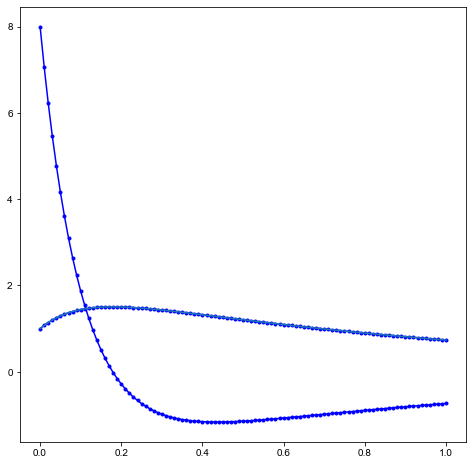

In [35]:
# physical parameter
mu = 10

def f_stiff(t, y):
    f = np.zeros_like(y)
    f[0] = y[1]
    f[1] = -mu * y[0] - (mu+1.) * y[1]
    return f

def y_ex(t):
    return 2.*np.exp(-1.*t) - np.exp(-1.*mu*t) 


# initial condition
y0 = np.array([1., mu - 2.])


# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 1.0
ts = np.linspace(t0, tend, N)

y_odeint = odeint(f_stiff, y0, ts, tfirst=True)


fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.plot(ts, y_odeint, 'b.-', label='odeint')
ax1.plot(ts,y_ex(ts))


0
552 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
604 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.18 ms ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.63 ms ± 86.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1
543 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
736 µs ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.49 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.48 ms ± 89.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2
738 µs ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.1 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.43 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.36 ms ± 395 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3
920 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.8 ms ± 60.9 µs per loop (mean ± std. dev. of 7 runs, 100 lo

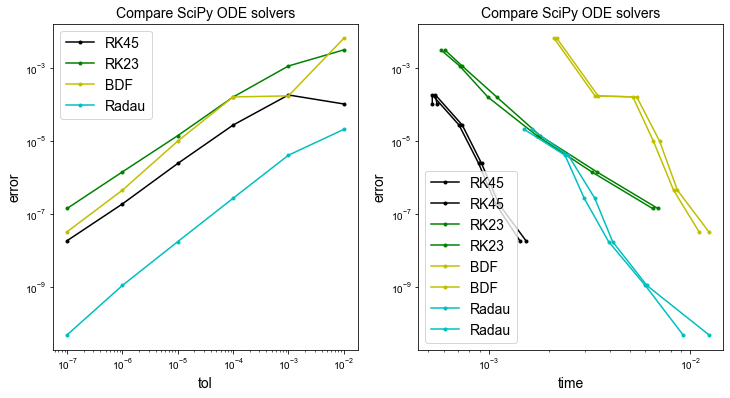

In [36]:
# physical parameter - a low mu value should not be stiff
mu = 1.

def f_stiff(t, y):
    f = np.zeros_like(y)
    f[0] = y[1]
    f[1] = -mu * y[0] - (mu+1.) * y[1]
    return f

def y_ex(t):
    return 2.*np.exp(-1.*t) - np.exp(-1.*mu*t) 



# initial condition
y0 = np.array([1., mu - 2.])


# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 1.0
ts = np.linspace(t0, tend, N)

tols = np.array([10.**(-p) for p in np.arange(2,8)])

errors_rk45 = np.zeros((len(tols)), dtype=float)
errors_rk23 = np.zeros((len(tols)), dtype=float)
errors_bdf = np.zeros((len(tols)), dtype=float)
errors_radau = np.zeros((len(tols)), dtype=float)

for i, tol in enumerate(tols):
    r_tol = tol
    a_tol = tol
    y_solve_ivp_rk45 = solve_ivp(f_stiff, [t0, tend], y0, method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk45[i] = np.abs(y_solve_ivp_rk45.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_rk23 = solve_ivp(f_stiff, [t0, tend], y0, method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk23[i] = np.abs(y_solve_ivp_rk23.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_bdf = solve_ivp(f_stiff, [t0, tend], y0, method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_bdf[i] = np.abs(y_solve_ivp_bdf.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_radau = solve_ivp(f_stiff, [t0, tend], y0, method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_radau[i] = np.abs(y_solve_ivp_radau.y[0][-1] - y_ex(ts[-1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.loglog(tols, errors_rk45, 'k.-', label='RK45')
ax1.loglog(tols, errors_rk23, 'g.-', label='RK23')
ax1.loglog(tols, errors_bdf, 'y.-', label='BDF')
ax1.loglog(tols, errors_radau, 'c.-', label='Radau')
ax1.set_xlabel('tol', fontsize=14)
ax1.set_ylabel('error', fontsize=14)
ax1.set_title('Compare SciPy ODE solvers', fontsize=14)
ax1.legend(loc='best', fontsize=14)


times_rk45 = np.zeros((len(tols),2), dtype=float)
times_rk23 = np.zeros((len(tols),2), dtype=float)
times_bdf = np.zeros((len(tols),2), dtype=float)
times_radau = np.zeros((len(tols),2), dtype=float)

for i, tol in enumerate(tols):
    print(i)
    r_tol = tol
    a_tol = tol
    timer = %timeit -o  y_solve_ivp_rk45 = solve_ivp(f_stiff, [t0, tend], y0, method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_rk45[i,0] = timer.best
    times_rk45[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_rk23 = solve_ivp(f_stiff, [t0, tend], y0, method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_rk23[i,0] = timer.best
    times_rk23[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_bdf = solve_ivp(f_stiff, [t0, tend], y0, method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_bdf[i,0] = timer.best
    times_bdf[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_radau = solve_ivp(f_stiff, [t0, tend], y0, method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_radau[i,0] = timer.best
    times_radau[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)

ax2.loglog(times_rk45, errors_rk45, 'k.-', label='RK45')
ax2.loglog(times_rk23, errors_rk23, 'g.-', label='RK23')
ax2.loglog(times_bdf, errors_bdf, 'y.-', label='BDF')
ax2.loglog(times_radau, errors_radau, 'c.-', label='Radau')
ax2.set_xlabel('time', fontsize=14)
ax2.set_ylabel('error', fontsize=14)
ax2.set_title('Compare SciPy ODE solvers', fontsize=14)
ax2.legend(loc='best', fontsize=14)

0
55.9 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.9 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.2 ms ± 961 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.02 ms ± 957 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1
66 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.8 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.5 ms ± 953 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.2 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2
57.3 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
57.3 ms ± 7.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.6 ms ± 785 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.8 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
3
61.3 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
62.1 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3

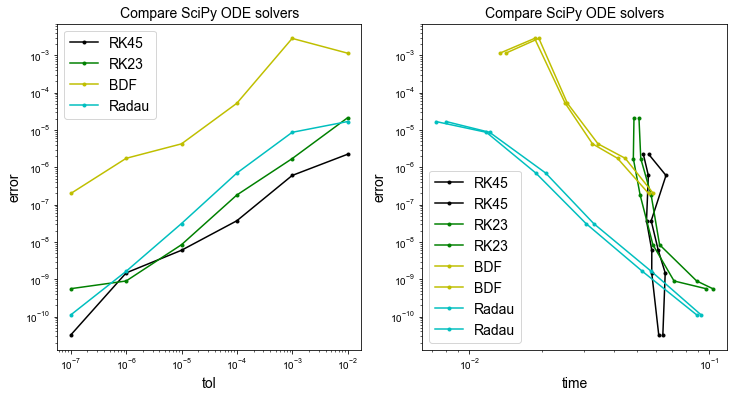

In [37]:
# physical parameter - larger mu
mu = 1000.

def f_stiff(t, y):
    f = np.zeros_like(y)
    f[0] = y[1]
    f[1] = -mu * y[0] - (mu+1.) * y[1]
    return f

def y_ex(t):
    return 2.*np.exp(-1.*t) - np.exp(-1.*mu*t) 



# initial condition
y0 = np.array([1., mu - 2.])


# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 1.0
ts = np.linspace(t0, tend, N)

tols = np.array([10.**(-p) for p in np.arange(2,8)])

errors_rk45 = np.zeros((len(tols)), dtype=float)
errors_rk23 = np.zeros((len(tols)), dtype=float)
errors_bdf = np.zeros((len(tols)), dtype=float)
errors_radau = np.zeros((len(tols)), dtype=float)

for i, tol in enumerate(tols):
    r_tol = tol
    a_tol = tol
    y_solve_ivp_rk45 = solve_ivp(f_stiff, [t0, tend], y0, method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk45[i] = np.abs(y_solve_ivp_rk45.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_rk23 = solve_ivp(f_stiff, [t0, tend], y0, method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk23[i] = np.abs(y_solve_ivp_rk23.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_bdf = solve_ivp(f_stiff, [t0, tend], y0, method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_bdf[i] = np.abs(y_solve_ivp_bdf.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_radau = solve_ivp(f_stiff, [t0, tend], y0, method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_radau[i] = np.abs(y_solve_ivp_radau.y[0][-1] - y_ex(ts[-1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.loglog(tols, errors_rk45, 'k.-', label='RK45')
ax1.loglog(tols, errors_rk23, 'g.-', label='RK23')
ax1.loglog(tols, errors_bdf, 'y.-', label='BDF')
ax1.loglog(tols, errors_radau, 'c.-', label='Radau')
ax1.set_xlabel('tol', fontsize=14)
ax1.set_ylabel('error', fontsize=14)
ax1.set_title('Compare SciPy ODE solvers', fontsize=14)
ax1.legend(loc='best', fontsize=14)


times_rk45 = np.zeros((len(tols),2), dtype=float)
times_rk23 = np.zeros((len(tols),2), dtype=float)
times_bdf = np.zeros((len(tols),2), dtype=float)
times_radau = np.zeros((len(tols),2), dtype=float)

for i, tol in enumerate(tols):
    print(i)
    r_tol = tol
    a_tol = tol
    timer = %timeit -o  y_solve_ivp_rk45 = solve_ivp(f_stiff, [t0, tend], y0, method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_rk45[i,0] = timer.best
    times_rk45[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_rk23 = solve_ivp(f_stiff, [t0, tend], y0, method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_rk23[i,0] = timer.best
    times_rk23[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_bdf = solve_ivp(f_stiff, [t0, tend], y0, method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_bdf[i,0] = timer.best
    times_bdf[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_radau = solve_ivp(f_stiff, [t0, tend], y0, method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_radau[i,0] = timer.best
    times_radau[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)

ax2.loglog(times_rk45, errors_rk45, 'k.-', label='RK45')
ax2.loglog(times_rk23, errors_rk23, 'g.-', label='RK23')
ax2.loglog(times_bdf, errors_bdf, 'y.-', label='BDF')
ax2.loglog(times_radau, errors_radau, 'c.-', label='Radau')
ax2.set_xlabel('time', fontsize=14)
ax2.set_ylabel('error', fontsize=14)
ax2.set_title('Compare SciPy ODE solvers', fontsize=14)
ax2.legend(loc='best', fontsize=14)

0
496 ms ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
461 ms ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.2 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.6 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
1
517 ms ± 25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
451 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.7 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 4.48 times longer than the fastest. This could mean that an intermediate result is being cached.
32.9 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2
The slowest run took 4.61 times longer than the fastest. This could mean that an intermediate result is being cached.
1.73 s ± 803 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.63 s ± 353 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 5.34 times longer than the fastest. This could m

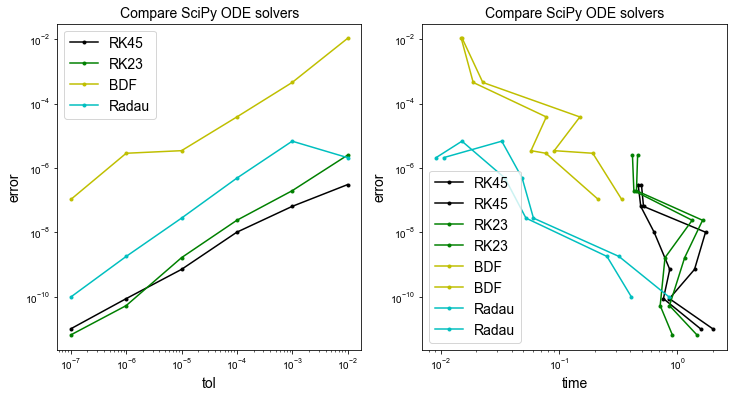

In [38]:
# physical parameter - larger mu
mu = 10000.

def f_stiff(t, y):
    f = np.zeros_like(y)
    f[0] = y[1]
    f[1] = -mu * y[0] - (mu+1.) * y[1]
    return f

def y_ex(t):
    return 2.*np.exp(-1.*t) - np.exp(-1.*mu*t) 



# initial condition
y0 = np.array([1., mu - 2.])


# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
N = 101
t0 = 0.0
tend = 1.0
ts = np.linspace(t0, tend, N)

tols = np.array([10.**(-p) for p in np.arange(2,8)])

errors_rk45 = np.zeros((len(tols)), dtype=float)
errors_rk23 = np.zeros((len(tols)), dtype=float)
errors_bdf = np.zeros((len(tols)), dtype=float)
errors_radau = np.zeros((len(tols)), dtype=float)

for i, tol in enumerate(tols):
    r_tol = tol
    a_tol = tol
    y_solve_ivp_rk45 = solve_ivp(f_stiff, [t0, tend], y0, method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk45[i] = np.abs(y_solve_ivp_rk45.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_rk23 = solve_ivp(f_stiff, [t0, tend], y0, method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_rk23[i] = np.abs(y_solve_ivp_rk23.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_bdf = solve_ivp(f_stiff, [t0, tend], y0, method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_bdf[i] = np.abs(y_solve_ivp_bdf.y[0][-1] - y_ex(ts[-1]))
    y_solve_ivp_radau = solve_ivp(f_stiff, [t0, tend], y0, method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    errors_radau[i] = np.abs(y_solve_ivp_radau.y[0][-1] - y_ex(ts[-1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.loglog(tols, errors_rk45, 'k.-', label='RK45')
ax1.loglog(tols, errors_rk23, 'g.-', label='RK23')
ax1.loglog(tols, errors_bdf, 'y.-', label='BDF')
ax1.loglog(tols, errors_radau, 'c.-', label='Radau')
ax1.set_xlabel('tol', fontsize=14)
ax1.set_ylabel('error', fontsize=14)
ax1.set_title('Compare SciPy ODE solvers', fontsize=14)
ax1.legend(loc='best', fontsize=14)


times_rk45 = np.zeros((len(tols),2), dtype=float)
times_rk23 = np.zeros((len(tols),2), dtype=float)
times_bdf = np.zeros((len(tols),2), dtype=float)
times_radau = np.zeros((len(tols),2), dtype=float)

for i, tol in enumerate(tols):
    print(i)
    r_tol = tol
    a_tol = tol
    timer = %timeit -o  y_solve_ivp_rk45 = solve_ivp(f_stiff, [t0, tend], y0, method='RK45', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_rk45[i,0] = timer.best
    times_rk45[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_rk23 = solve_ivp(f_stiff, [t0, tend], y0, method='RK23', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_rk23[i,0] = timer.best
    times_rk23[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_bdf = solve_ivp(f_stiff, [t0, tend], y0, method='BDF', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_bdf[i,0] = timer.best
    times_bdf[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)
    timer = %timeit -o  y_solve_ivp_radau = solve_ivp(f_stiff, [t0, tend], y0, method='Radau', t_eval=ts, rtol=r_tol, atol=a_tol)
    times_radau[i,0] = timer.best
    times_radau[i,1] = np.sum(timer.all_runs) / (timer.repeat*timer.loops)

ax2.loglog(times_rk45, errors_rk45, 'k.-', label='RK45')
ax2.loglog(times_rk23, errors_rk23, 'g.-', label='RK23')
ax2.loglog(times_bdf, errors_bdf, 'y.-', label='BDF')
ax2.loglog(times_radau, errors_radau, 'c.-', label='Radau')
ax2.set_xlabel('time', fontsize=14)
ax2.set_ylabel('error', fontsize=14)
ax2.set_title('Compare SciPy ODE solvers', fontsize=14)
ax2.legend(loc='best', fontsize=14)

There are a few observations we can make here

1. As $\mu$ is increased we increase the "stiffness" of the problem as this parameter controls the ratio of the eigenvalues. At $\mu=1$ the explicit RK45 method performs well and the implicit methods are less efficient. At higher $\mu$ values the explicit methods become less and less competitive (as expected as the explicit methods are limited by stability rather than accuracy in the time step sizes they can employ).


2. For this test case at least the Radau method always outperforms BDF - but take a look at the discussion here <https://scicomp.stackexchange.com/questions/27178/bdf-vs-implicit-runge-kutta-time-stepping> which indicates that we may expect BDF to be more competitive the more costly $f$ is to evaluate (here $f$ is cheap).


3. For stiff problems the timings of the explicit methods appears to become largely independent of the error - this perhaps indicates that (as we would expect from stability theory and the definition of stiffness) the time step is being chosen for stability rather than accuracy reasons (and the stability of the problem does not change as we vary the desired error tolerance `tol`).

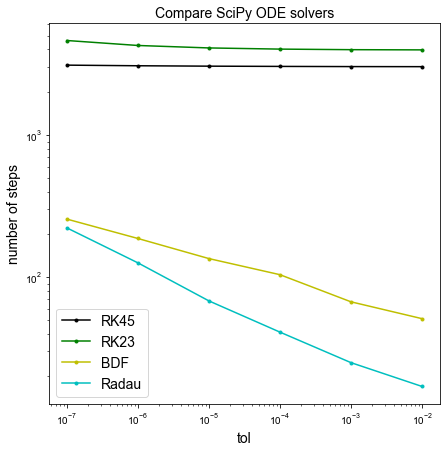

In [39]:
steps_rk45 = np.zeros((len(tols)), dtype=float)
steps_rk23 = np.zeros((len(tols)), dtype=float)
steps_bdf = np.zeros((len(tols)), dtype=float)
steps_radau = np.zeros((len(tols)), dtype=float)

for i, tol in enumerate(tols):
    r_tol = tol
    a_tol = tol
    y_solve_ivp_rk45 = solve_ivp(f_stiff, [t0, tend], y0, method='RK45', rtol=r_tol, atol=a_tol)
    steps_rk45[i] = len(y_solve_ivp_rk45.t)
    y_solve_ivp_rk23 = solve_ivp(f_stiff, [t0, tend], y0, method='RK23', rtol=r_tol, atol=a_tol)
    steps_rk23[i] = len(y_solve_ivp_rk23.t)
    y_solve_ivp_bdf = solve_ivp(f_stiff, [t0, tend], y0, method='BDF', rtol=r_tol, atol=a_tol)
    steps_bdf[i] = len(y_solve_ivp_bdf.t)
    y_solve_ivp_radau = solve_ivp(f_stiff, [t0, tend], y0, method='Radau', rtol=r_tol, atol=a_tol)
    steps_radau[i] = len(y_solve_ivp_radau.t)

    
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

ax1.loglog(tols, steps_rk45, 'k.-', label='RK45')
ax1.loglog(tols, steps_rk23, 'g.-', label='RK23')
ax1.loglog(tols, steps_bdf, 'y.-', label='BDF')
ax1.loglog(tols, steps_radau, 'c.-', label='Radau')
ax1.set_xlabel('tol', fontsize=14)
ax1.set_ylabel('number of steps', fontsize=14)
ax1.set_title('Compare SciPy ODE solvers', fontsize=14)
ax1.legend(loc='best', fontsize=14)

And this appears to confirm our hypothesis that for the stiff problem even with a low error tolerance the explicit schemes are having to do a large number of time steps simply for stability but not accuracy reasons.